# Introduction and Processing of the Data

> **TODO:** several paragraphs indicating:
> - What is the work about?
> - Why is it interesting?
> - Business volume of the domain
> - Local/national importance and relevance in the current context
>
> It's important to provide a solid justification for the interest in the domain and link to relevant sites as well as references.

In this project we will treat with data of various nature related to countries in the year 2023 including but not limited to health, economic, enviromental and educational indicators. The main objective is to explore how these different indicators relate and influence each other in various ways, some of which may seem obvious although having data to back our intuitions is needed to confidently make any statement.

We found this topic interesting due to several factors, but it mainly comes down to three main statements:
- People, including us, have many opinions on how some factors influence others when it comes to quality of life (e.g. Better education leads to better economy) but most of these are based on what we have discussed with others and intuition, thus our opinions are not directly based on irrefutable facts. While many of these beliefs may show to be accurate, we wish to do our best to confirm or refute many of these beliefs based on the data at hand
- In the same manner, we believe that having evidence and data to back evidences up are a great tool against facts manipulation, which it's common in many places in the world.
- From the point of view of developing our skills we believe this dataset lends itself very well to outsourcing information and incorporating new sources of data to the selected dataset which may help answer some questions in a better way. 

Moreover, this is a valuable opportunity to understand the sheer scale of data available and the insights that can be derived from it. The global volume of data concerning economic, educational, health, and environmental indicators is immense, with organizations and governments continuously collecting, analyzing, and reporting new statistics. By exploring connections within this data, we can uncover patterns that may not be immediately apparent, providing a more comprehensive understanding of how different factors interact. This analytical approach allows for evidence-based decision-making, reducing reliance on assumptions and leading to more informed discussions on policies, development strategies, and quality-of-life improvements.

In the context of Spain in 2025, analyzing data across economic, educational, health, and environmental indicators is crucial for informed decision-making and policy development. Spain has demonstrated significant economic resilience, with a GDP growth of 3.2% in 2024, surpassing the eurozone average, and a projected growth of 2.6% in 2025. This positive trajectory is attributed to innovative policies, investments in renewable energy, and a revitalized labor market [[1]](https://elpais.com/economia/2025-02-09/la-economia-espanola-sorprende-al-mundo-de-oveja-negra-a-motor-europeo.html)

However, challenges persist, including high unemployment rates and environmental vulnerabilities. The devastating floods in Valencia in October 2024, which resulted in over 220 fatalities, underscored the need for enhanced climate resilience and infrastructure investment.[[2]](https://www.reuters.com/sustainability/sustainable-finance-reporting/valencia-floods-prompt-race-funds-boost-spains-climate-resilience-2025-02-06)

By examining the interplay between these indicators, stakeholders can develop strategies to bolster economic growth, improve educational outcomes, enhance public health, and strengthen environmental sustainability. This comprehensive analysis is essential for addressing current challenges and ensuring long-term prosperity in Spain.

### Dataset Description

> **TODO:** dataset description indicating:
> - Size in KB/MB/GB
> - Number of rows and columns
> - Where the dataset was sourced from
> - Types of data and specific meanings of the really important columns.

As we incorporate other sources apart from the original dataset we started this, we will define the original dataset here and define the rest as they are included and used.

**Size of original dataset:** 49210 Bytes

**Dimensions:** 195 rows (countries) x 35 columns (indicators)

**Source:** [kaggle](https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023)

**Columns:** 

- **Geographical Indicators:**
    - **Country:** Name of the country.
    - **Abbreviation:** Abbreviation or code representing the country.
    - **Land Area (Km2):** Total land area of the country in square kilometers.
    - **Latitude:** Latitude coordinate of the country's location.
    - **Longitude:** Longitude coordinate of the country's location.

- **Demographic Indicators:**
    - **Population:** Total population of the country.
    - **Density (P/Km2):** Population density measured in persons per square kilometer.
    - **Birth Rate:** Number of births per 1,000 population per year.
    - **Fertility Rate:** Average number of children born to a woman during her lifetime.
    - **Infant Mortality:** Number of deaths per 1,000 live births before reaching one year of age.
    - **Life Expectancy:** Average number of years a newborn is expected to live.
    - **Urban Population:** Population living in urban areas.

- **Economic Indicators:**
    - **GDP:** Gross Domestic Product, the total value of goods and services produced in the country.
    - **CPI:** Consumer Price Index, a measure of inflation and purchasing power.
    - **CPI Change (%):** Percentage change in the Consumer Price Index compared to the previous year.
    - **Minimum Wage:** Minimum wage level in local currency.
    - **Tax Revenue (%):** Tax revenue as a percentage of GDP.
    - **Total Tax Rate:** Overall tax burden as a percentage of commercial profits.
    - **Unemployment Rate:** Percentage of the labor force that is unemployed.
    - **Gasoline_Price:** Price of gasoline per liter in local currency.
    - **Labor Force Participation (%):** Percentage of the population that is part of the labor force.

- **Health Indicators:**
    - **CO2 Emissions:** Carbon dioxide emissions in kilotonnes.
    - **Out of Pocket Health Expenditure (%):** Percentage of total health expenditure paid out-of-pocket by individuals.
    - **Physicians per Thousand:** Number of physicians per thousand people.
    - **Maternal Mortality Ratio:** Number of maternal deaths per 100,000 live births.

- **Education Indicators:**
    - **Gross Primary Education Enrollment (%):** Gross enrollment ratio for primary education.
    - **Gross Tertiary Education Enrollment (%):** Gross enrollment ratio for tertiary education.

- **Miscellaneous Indicators:**
    - **Agricultural Land (%):** Percentage of land area used for agricultural purposes.
    - **Forested Area (%):** Percentage of land area covered by forests.
    - **Armed Forces Size:** Size of the armed forces in the country.
    - **Calling Code:** International calling code for the country.
    - **Capital/Major City:** Name of the capital or major city.
    - **Currency_Code:** Currency code used in the country.
    - **Largest City:** Name of the country's largest city.
    - **Official Language:** Official language(s) spoken in the country.

### Data Processing

> **TODO:** describe the details, problems, and transformations applied when importing and cleaning the dataset.

First, we will import the necessary libraries.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns
from matplotlib.axes import Axes
from polars.dataframe.frame import DataFrame
from PyPDF2 import PdfReader
from sklearn.impute import IterativeImputer

Now, we will load the dataset, fix some column names and display the first few rows and its types to understand the structure of the data.

In [2]:
raw_df: DataFrame = pl.read_csv(
    source="../data/raw/world-data-2023.csv", ignore_errors=True
)
raw_df.head()

Country,Density (P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
str,str,str,str,str,str,f64,i64,str,str,f64,str,str,f64,str,str,str,str,str,f64,str,f64,i64,str,str,str,f64,str,str,str,str,str,str,f64,f64
"""Afghanistan""","""60""","""AF""","""58.10%""","""652,230""","""323,000""",32.49,93,"""Kabul""","""8,672""",149.9,"""2.30%""","""AFN""",4.47,"""2.10%""","""$0.70 ""","""$19,101,353,833 ""","""104.00%""","""9.70%""",47.9,"""Kabul""",64.5,638,"""$0.43 ""","""Pashto""","""78.40%""",0.28,"""38,041,754""","""48.90%""","""9.30%""","""71.40%""","""11.12%""","""9,797,273""",33.93911,67.709953
"""Albania""","""105""","""AL""","""43.10%""","""28,748""","""9,000""",11.78,355,"""Tirana""","""4,536""",119.05,"""1.40%""","""ALL""",1.62,"""28.10%""","""$1.36 ""","""$15,278,077,447 ""","""107.00%""","""55.00%""",7.8,"""Tirana""",78.5,15,"""$1.12 ""","""Albanian""","""56.90%""",1.2,"""2,854,191""","""55.70%""","""18.60%""","""36.60%""","""12.33%""","""1,747,593""",41.153332,20.168331
"""Algeria""","""18""","""DZ""","""17.40%""","""2,381,741""","""317,000""",24.28,213,"""Algiers""","""150,006""",151.36,"""2.00%""","""DZD""",3.02,"""0.80%""","""$0.28 ""","""$169,988,236,398 ""","""109.90%""","""51.40%""",20.1,"""Algiers""",76.7,112,"""$0.95 ""","""Arabic""","""28.10%""",1.72,"""43,053,054""","""41.20%""","""37.20%""","""66.10%""","""11.70%""","""31,510,100""",28.033886,1.659626
"""Andorra""","""164""","""AD""","""40.00%""","""468""",null,7.2,376,"""Andorra la Vella""","""469""",null,null,"""EUR""",1.27,"""34.00%""","""$1.51 ""","""$3,154,057,987 ""","""106.40%""",null,2.7,"""Andorra la Vella""",null,null,"""$6.63 ""","""Catalan""","""36.40%""",3.33,"""77,142""",null,null,null,null,"""67,873""",42.506285,1.521801
"""Angola""","""26""","""AO""","""47.50%""","""1,246,700""","""117,000""",40.73,244,"""Luanda""","""34,693""",261.73,"""17.10%""","""AOA""",5.52,"""46.30%""","""$0.97 ""","""$94,635,415,870 ""","""113.50%""","""9.30%""",51.6,"""Luanda""",60.8,241,"""$0.71 ""","""Portuguese""","""33.40%""",0.21,"""31,825,295""","""77.50%""","""9.20%""","""49.10%""","""6.89%""","""21,061,025""",-11.202692,17.873887


We observe some inconsistancies in column naming, so we will rename some columns to make them more readable and consistent.

In [3]:
# Fix some column names
raw_df: DataFrame = raw_df.rename(mapping={"Density\r\n(P/Km2)": "Density(P/Km2)"})
raw_df = raw_df.rename(mapping={"Agricultural Land( %)": "Agricultural Land(%)"})
raw_df = raw_df.rename(mapping={"Urban_population": "Urban population"})

# Display first 5 rows and column types
raw_df.head(5)

Country,Density(P/Km2),Abbreviation,Agricultural Land(%),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban population,Latitude,Longitude
str,str,str,str,str,str,f64,i64,str,str,f64,str,str,f64,str,str,str,str,str,f64,str,f64,i64,str,str,str,f64,str,str,str,str,str,str,f64,f64
"""Afghanistan""","""60""","""AF""","""58.10%""","""652,230""","""323,000""",32.49,93,"""Kabul""","""8,672""",149.9,"""2.30%""","""AFN""",4.47,"""2.10%""","""$0.70 ""","""$19,101,353,833 ""","""104.00%""","""9.70%""",47.9,"""Kabul""",64.5,638,"""$0.43 ""","""Pashto""","""78.40%""",0.28,"""38,041,754""","""48.90%""","""9.30%""","""71.40%""","""11.12%""","""9,797,273""",33.93911,67.709953
"""Albania""","""105""","""AL""","""43.10%""","""28,748""","""9,000""",11.78,355,"""Tirana""","""4,536""",119.05,"""1.40%""","""ALL""",1.62,"""28.10%""","""$1.36 ""","""$15,278,077,447 ""","""107.00%""","""55.00%""",7.8,"""Tirana""",78.5,15,"""$1.12 ""","""Albanian""","""56.90%""",1.2,"""2,854,191""","""55.70%""","""18.60%""","""36.60%""","""12.33%""","""1,747,593""",41.153332,20.168331
"""Algeria""","""18""","""DZ""","""17.40%""","""2,381,741""","""317,000""",24.28,213,"""Algiers""","""150,006""",151.36,"""2.00%""","""DZD""",3.02,"""0.80%""","""$0.28 ""","""$169,988,236,398 ""","""109.90%""","""51.40%""",20.1,"""Algiers""",76.7,112,"""$0.95 ""","""Arabic""","""28.10%""",1.72,"""43,053,054""","""41.20%""","""37.20%""","""66.10%""","""11.70%""","""31,510,100""",28.033886,1.659626
"""Andorra""","""164""","""AD""","""40.00%""","""468""",null,7.2,376,"""Andorra la Vella""","""469""",null,null,"""EUR""",1.27,"""34.00%""","""$1.51 ""","""$3,154,057,987 ""","""106.40%""",null,2.7,"""Andorra la Vella""",null,null,"""$6.63 ""","""Catalan""","""36.40%""",3.33,"""77,142""",null,null,null,null,"""67,873""",42.506285,1.521801
"""Angola""","""26""","""AO""","""47.50%""","""1,246,700""","""117,000""",40.73,244,"""Luanda""","""34,693""",261.73,"""17.10%""","""AOA""",5.52,"""46.30%""","""$0.97 ""","""$94,635,415,870 ""","""113.50%""","""9.30%""",51.6,"""Luanda""",60.8,241,"""$0.71 ""","""Portuguese""","""33.40%""",0.21,"""31,825,295""","""77.50%""","""9.20%""","""49.10%""","""6.89%""","""21,061,025""",-11.202692,17.873887


We observed that some of the columns are not in the correct data type. We will convert them to the correct data type.

Certain columns contain numerical values formatted as strings with commas (`,`) as thousand separators. These need to be cleaned and converted into integers. These columns include:
- `Density(P/Km2)`
- `Land Area(Km2)`
- `Armed Forces size`
- `Co2-Emissions`
- `Population`
- `Urban population`

Some columns contain monetary values formatted as strings with dollar signs (`$`) and commas (`,`) as thousand separators. These need to be cleaned and converted into floats. These columns include:
- `Gasoline Price`
- `GDP`
- `Minimum wage`

Some columns contain percentages formatted as strings with percentage signs (`%`). These need to be cleaned and converted into floats. These columns include:
- `Agricultural Land(%)`
- `CPI Change (%)`
- `Forested Area (%)`
- `Gross primary education enrollment (%)`
- `Gross tertiary education enrollment (%)`
- `Out of pocket health expenditure`
- `Population: Labor force participation (%)`
- `Tax revenue (%)`
- `Total tax rate`
- `Unemployment rate`

In [4]:
data: DataFrame = raw_df.clone()

# Columns that should be integers
int_columns: list[str] = [
    "Density(P/Km2)",
    "Land Area(Km2)",
    "Armed Forces size",
    "Co2-Emissions",
    "Population",
    "Urban population",
]
data = data.with_columns(
    [
        pl.col(name=col)
        .str.strip_chars()
        .str.replace_all(pattern=",", value="")
        .cast(dtype=pl.Int64)
        for col in int_columns
    ]
)

# Currency columns that should be floats
float_columns_currency: list[str] = ["Gasoline Price", "GDP", "Minimum wage"]
data = data.with_columns(
    [
        pl.col(name=col)
        .str.strip_chars()
        .str.replace_all(pattern=r"[\$,]", value="")
        .cast(dtype=pl.Float64)
        for col in float_columns_currency
    ]
)

# Percentage columns that should be floats
float_columns_percentage: list[str] = [
    "Agricultural Land(%)",
    "CPI Change (%)",
    "Forested Area (%)",
    "Gross primary education enrollment (%)",
    "Gross tertiary education enrollment (%)",
    "Out of pocket health expenditure",
    "Population: Labor force participation (%)",
    "Tax revenue (%)",
    "Total tax rate",
    "Unemployment rate",
]
data = data.with_columns(
    [
        pl.col(name=col)
        .str.strip_chars()
        .str.replace_all(pattern="%", value="")
        .cast(dtype=pl.Float64)
        for col in float_columns_percentage
    ]
)

data.head(n=5)

Country,Density(P/Km2),Abbreviation,Agricultural Land(%),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban population,Latitude,Longitude
str,i64,str,f64,i64,i64,f64,i64,str,i64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,str,f64,i64,f64,str,f64,f64,i64,f64,f64,f64,f64,i64,f64,f64
"""Afghanistan""",60,"""AF""",58.1,652230,323000,32.49,93,"""Kabul""",8672,149.9,2.3,"""AFN""",4.47,2.1,0.7,1.9101e10,104.0,9.7,47.9,"""Kabul""",64.5,638,0.43,"""Pashto""",78.4,0.28,38041754,48.9,9.3,71.4,11.12,9797273,33.93911,67.709953
"""Albania""",105,"""AL""",43.1,28748,9000,11.78,355,"""Tirana""",4536,119.05,1.4,"""ALL""",1.62,28.1,1.36,1.5278e10,107.0,55.0,7.8,"""Tirana""",78.5,15,1.12,"""Albanian""",56.9,1.2,2854191,55.7,18.6,36.6,12.33,1747593,41.153332,20.168331
"""Algeria""",18,"""DZ""",17.4,2381741,317000,24.28,213,"""Algiers""",150006,151.36,2.0,"""DZD""",3.02,0.8,0.28,1.6999e11,109.9,51.4,20.1,"""Algiers""",76.7,112,0.95,"""Arabic""",28.1,1.72,43053054,41.2,37.2,66.1,11.7,31510100,28.033886,1.659626
"""Andorra""",164,"""AD""",40.0,468,null,7.2,376,"""Andorra la Vella""",469,null,null,"""EUR""",1.27,34.0,1.51,3.1541e9,106.4,null,2.7,"""Andorra la Vella""",null,null,6.63,"""Catalan""",36.4,3.33,77142,null,null,null,null,67873,42.506285,1.521801
"""Angola""",26,"""AO""",47.5,1246700,117000,40.73,244,"""Luanda""",34693,261.73,17.1,"""AOA""",5.52,46.3,0.97,9.4635e10,113.5,9.3,51.6,"""Luanda""",60.8,241,0.71,"""Portuguese""",33.4,0.21,31825295,77.5,9.2,49.1,6.89,21061025,-11.202692,17.873887


While exploring the data, we noticed that two rows did not have almost any information on any of the column. As these columns could add noise on further analysis and an effort to fin most of this information on our own resulted in no success, we decided that these rows, corresponding to Palestine and Vatican City countries will be removed from the dataset.

In [5]:
# Show Palestine and Vatican City rows
empty_rows: DataFrame = data.filter(
    pl.col(name="Country").is_in(
        other=["Palestinian National Authority", "Vatican City"]
    )
)
empty_rows

Country,Density(P/Km2),Abbreviation,Agricultural Land(%),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban population,Latitude,Longitude
str,i64,str,f64,i64,i64,f64,i64,str,i64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,str,f64,i64,f64,str,f64,f64,i64,f64,f64,f64,f64,i64,f64,f64
"""Vatican City""",2003,null,null,0,null,null,379,"""Vatican City""",null,null,null,"""EUR""",null,null,null,null,null,null,null,null,null,null,null,"""Italian""",null,null,836,null,null,null,null,null,41.902916,12.453389
"""Palestinian National Authority""",847,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""Arabic""",null,null,null,null,null,null,null,null,31.952162,35.233154


In [6]:
# Remove rows that are completely empty
data: DataFrame = data.filter(
    ~pl.col(name="Country").is_in(
        other=["Palestinian National Authority", "Vatican City"]
    )
)

Same as with the previous rows, we believe that some columns may not include any valuable information for our analysis. We can analyse the different cases:

- **Calling Code, Capital/Major City, Largest City, Official language:** These columns do not add any valuable information as they are country-specific and do not provide any insights for our analysis. We will drop them.
- **CPI change:** This column does not provide any valuable information for our analysis because we do not want to analyze the evolution of the Consumer Price Index. We will drop it and keep the `CPI` column.
- **Abbreviation, Latitude, Longitude:** These columns are not necessary for our analysis, but we will keep them for visualization purposes.
- **Minimum wage currency:** This column being kept would depend on the questions we want to answer and the feasability to find and fill the missing data. We will keep it for now.

Note that those column with all values being unique are included above.

In [7]:
columns_to_drop: list[str] = [
    "Calling Code",
    "Capital/Major City",
    "Largest City",
    "Official language",
    "CPI change",
]

columns_to_keep: list[str] = [col for col in data.columns if col not in columns_to_drop]

cleaned_df: DataFrame = data.select(columns_to_keep)

We observed that there was a country name with some special characters. Thanks to the `Abbriviation` column, we identified that the country is Sao Tome and Principe. We will replace the special characters with the correct ones.

In [8]:
# Show special characters in the Country column
special_chars: DataFrame = cleaned_df.filter(pl.col("Country").str.contains("�"))
special_chars

Country,Density(P/Km2),Abbreviation,Agricultural Land(%),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban population,Latitude,Longitude
str,i64,str,f64,i64,i64,f64,i64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,str,f64,i64,f64,f64,f64,i64,f64,f64,f64,f64,i64,f64,f64
"""S�����������""",228,"""ST""",50.7,964,1000,31.54,121,185.09,7.9,"""STN""",4.32,55.8,null,4.29016605e8,106.8,13.4,24.4,"""S����""",70.2,130,null,11.7,0.05,215056,57.8,14.6,37.0,13.37,158277,null,null


In [9]:
# Replace the row with the symbol with its corresponding country
cleaned_df: DataFrame = cleaned_df.with_columns(
    pl.when(pl.col(name="Country").str.contains(pattern="�"))
    .then(statement=pl.lit(value="Sao Tome and Principe"))
    .otherwise(statement=pl.col(name="Country"))
    .alias(name="Country")
)
cleaned_df.filter(pl.col("Country").str.contains("Sao"))

Country,Density(P/Km2),Abbreviation,Agricultural Land(%),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban population,Latitude,Longitude
str,i64,str,f64,i64,i64,f64,i64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,str,f64,i64,f64,f64,f64,i64,f64,f64,f64,f64,i64,f64,f64
"""Sao Tome and Principe""",228,"""ST""",50.7,964,1000,31.54,121,185.09,7.9,"""STN""",4.32,55.8,null,4.29016605e8,106.8,13.4,24.4,"""S����""",70.2,130,null,11.7,0.05,215056,57.8,14.6,37.0,13.37,158277,null,null


We also noticed that some abbreviations did not follow the ISO 3166-1 alpha-2 standard, while others were null. We will replace them with the correct ones, using a PDF file that contains the correct abbreviations.

An example is Republic of Ireland, which has a null abbreviation.

In [10]:
# Show Republic of Ireland row
country_row: DataFrame = cleaned_df.filter(
    pl.col(name="Country") == "Republic of Ireland"
)
country_row

Country,Density(P/Km2),Abbreviation,Agricultural Land(%),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban population,Latitude,Longitude
str,i64,str,f64,i64,i64,f64,i64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,str,f64,i64,f64,f64,f64,i64,f64,f64,f64,f64,i64,f64,f64
"""Republic of Ireland""",72,null,64.5,70273,9000,12.5,37711,106.58,0.9,"""EUR""",1.75,11.0,1.37,3.8870e11,100.9,77.8,3.1,"""Connacht""",82.3,5,10.79,15.2,3.31,5007069,62.1,18.3,26.1,4.93,3133123,53.41291,-8.24389


In [11]:
# Get the correct ISO code abbreviations for each country
isoCodes = PdfReader(stream="../data/raw/CountryCodesISO2.pdf")
text: list[str] = []
for page in isoCodes.pages:
    page_text: str = page.extract_text()
    lines: list[str] = page_text.splitlines()
    # Skip any empty lines and the 'Country Codes ISO2' title
    filtered_lines: list[str] = [
        line for line in lines if line.strip() and "Country Codes ISO2" not in line
    ]
    text.extend(filtered_lines)

country_code: dict[str, str] = {}
for line in text:
    parts: list[str] = line.strip().split(maxsplit=1)
    if len(parts) == 2 and len(parts[0]) == 2 and parts[0].isalpha():
        code, country = parts
        country_code[country.split(sep=" (")[0]] = code.upper()


def get_country_code(country) -> str:
    return country_code.get(country)


# Create a new corrected column
cleaned_df: DataFrame = cleaned_df.with_columns(
    pl.when(
        (pl.col(name="Abbreviation").is_null()) | (pl.col(name="Abbreviation") == "")
    )
    .then(
        statement=pl.col(name="Country").map_elements(
            function=get_country_code, return_dtype=pl.Utf8
        )
    )
    .otherwise(statement=pl.col(name="Abbreviation"))
    .alias(name="Abbreviation")
)

Now, we can verify that the abbreviations have been corrected.

In [12]:
# Show Republic of Ireland row
country_row = cleaned_df.filter(pl.col("Country") == "Republic of Ireland")
country_row

Country,Density(P/Km2),Abbreviation,Agricultural Land(%),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban population,Latitude,Longitude
str,i64,str,f64,i64,i64,f64,i64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,str,f64,i64,f64,f64,f64,i64,f64,f64,f64,f64,i64,f64,f64
"""Republic of Ireland""",72,"""IE""",64.5,70273,9000,12.5,37711,106.58,0.9,"""EUR""",1.75,11.0,1.37,3.8870e11,100.9,77.8,3.1,"""Connacht""",82.3,5,10.79,15.2,3.31,5007069,62.1,18.3,26.1,4.93,3133123,53.41291,-8.24389


And that there are no nulls or empty strings in the `Abbreviation` column.

In [13]:
len(
    cleaned_df.filter(
        (pl.col("Abbreviation").is_null()) | (pl.col("Abbreviation") == "")
    ).rows()
)

0

### Null Values

We will check for null values in the dataset and display the columns with null values.

We will then go and fix as many columns as we can by filling the missing values by outsourcing the data we can find.

Now, we are going to display the percentage of missing values in each column.

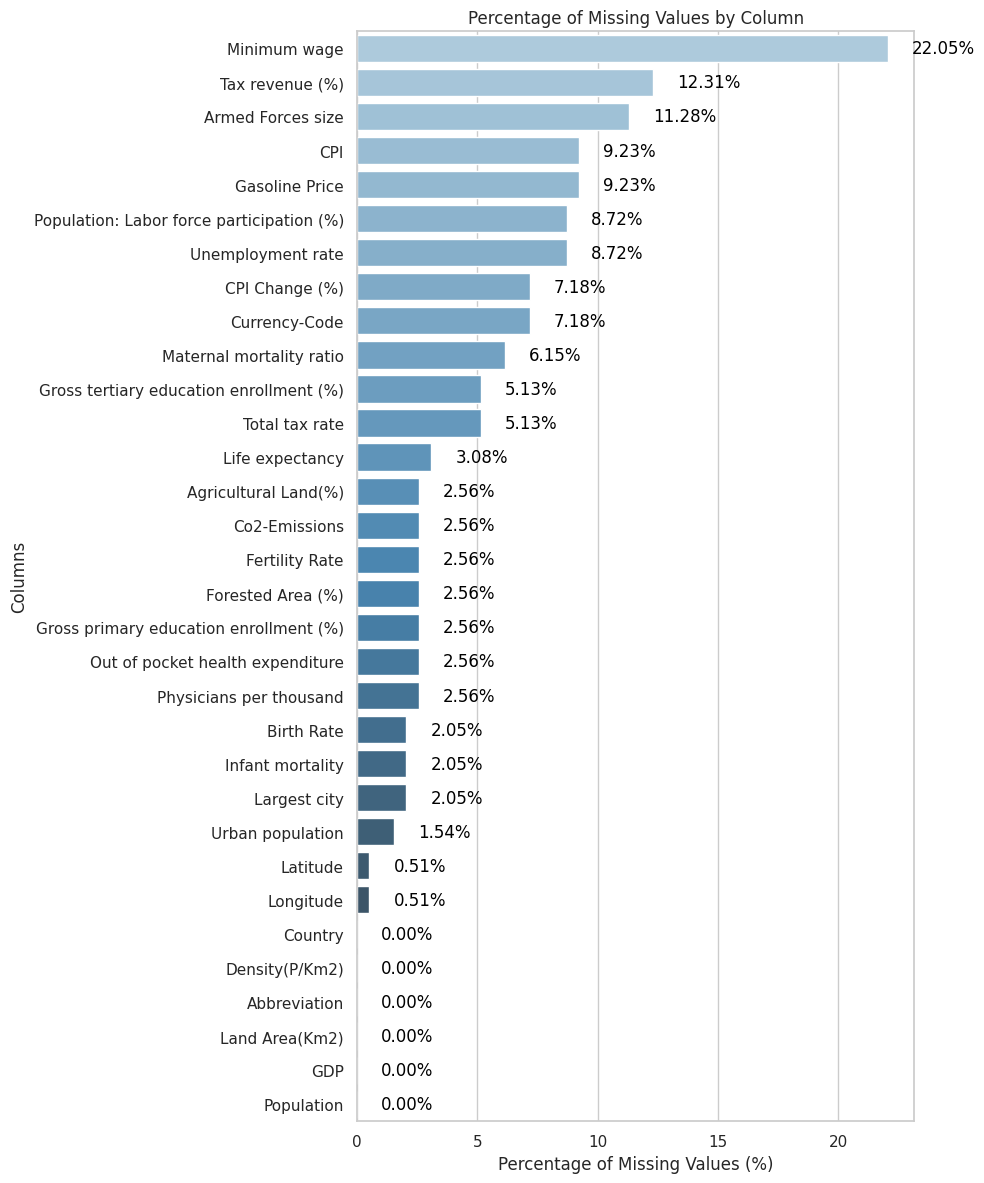

In [14]:
missing_data_summary: DataFrame = (
    cleaned_df.select(
        [
            ((pl.col(name=column).is_null().sum() / 195) * 100).alias(name=column)
            for column in cleaned_df.columns
        ]
    )
    .transpose(include_header=True)
    .sort(by="column_0", descending=True)
)

columns: list[str] = missing_data_summary["column"].to_list()
missing_percentages: list[float] = missing_data_summary["column_0"].to_list()

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 12))
ax: Axes = sns.barplot(x=missing_percentages, y=columns, palette="Blues_d", hue=columns)

for p in ax.patches:
    ax.text(
        x=p.get_width() + 1,
        y=p.get_y() + p.get_height() / 2,
        s=f"{p.get_width():.2f}%",
        va="center",
        ha="left",
        color="black",
    )

plt.xlabel(xlabel="Percentage of Missing Values (%)")
plt.ylabel(ylabel="Columns")
plt.title(label="Percentage of Missing Values by Column")
plt.tight_layout()
plt.show()

As we can see, there are some columns with a considerable amount of missing values. We will try to find information to fill these missing values as far as possible.

We're going to update Forested Area (%) by using the information of `environment_analysis.ipynb`. For more detail on how we obtained these values you can take a look at that notebook:

In [15]:
null_values: DataFrame = cleaned_df.filter(
    cleaned_df["Forested Area (%)"].is_null() | cleaned_df["Forested Area (%)"].is_nan()
)

null_values.select(["Country", "Forested Area (%)"])

Country,Forested Area (%)
str,f64
"""Eswatini""",null
"""Monaco""",null
"""Nauru""",null
"""North Macedonia""",null
"""South Sudan""",null


In [16]:
forest_df = pl.read_csv("../data/cleaned/forest_exported.csv", ignore_errors=True)

ls_countries: list[str] = [
    "Eswatini",
    "North Macedonia",
    "South Sudan",
    "Monaco",
    "Nauru",
]

merged_df = cleaned_df.join(forest_df, on="Country", how="left", suffix="_temporal")

cleaned_df = merged_df.with_columns(
    pl.when(
        pl.col("Country").is_in(ls_countries) & pl.col("Forested Area (%)").is_null()
    )
    .then(pl.col("Forested Area (%)_temporal").round(1))
    .otherwise(pl.col("Forested Area (%)"))
    .alias("Forested Area (%)")
).drop("Forested Area (%)_temporal")

cleaned_df.select(["Country", "Forested Area (%)"])[56:57]

Country,Forested Area (%)
str,f64
"""Eswatini""",29.1


Now, we're going to update Life expectancy column by using Kaggle's [Global Life Expectancy dataset](https://www.kaggle.com/datasets/nafayunnoor/global-life-expectancy-data-1950-2023?select=Preprocessed_Life_Expectancy.csv)

In [17]:
null_values: DataFrame = cleaned_df.filter(
    cleaned_df["Life expectancy"].is_null() | cleaned_df["Life expectancy"].is_nan()
)

null_values.select(["Country", "Life expectancy"])

Country,Life expectancy
str,f64
"""Andorra""",null
"""Eswatini""",null
"""Monaco""",null
"""Nauru""",null
"""North Macedonia""",null
"""Tuvalu""",null


In [18]:
ls_countries: list[str] = [
    "Andorra",
    "Eswatini",
    "Monaco",
    "Nauru",
    "North Macedonia",
    "Tuvalu",
]
ls_values: list[float] = [84.04, 64.12, 86.37, 63.10, 77.39, 67.10]

for i in range(0, len(ls_countries)):
    cleaned_df: DataFrame = cleaned_df.with_columns(
        pl.when(pl.col(name="Country") == ls_countries[i])
        .then(statement=ls_values[i])
        .otherwise(statement=pl.col(name="Life expectancy"))
        .alias(name="Life expectancy")
    )

Filter countries where latitude or longitude is null or empty

In [19]:
null_values: DataFrame = cleaned_df.filter(
    cleaned_df["Latitude"].is_null()
    | cleaned_df["Latitude"].is_nan()
    | cleaned_df["Longitude"].is_null()
    | cleaned_df["Longitude"].is_nan()
)

null_values.select(["Country", "Latitude", "Longitude"])

Country,Latitude,Longitude
str,f64,f64
"""Sao Tome and Principe""",null,null


To update this column, we're going to check the values using the following website: https://www.latlong.net/place/s-o-tom-and-pr-ncipe-island-25177.html

In [20]:
cleaned_df: DataFrame = cleaned_df.with_columns(
    pl.when(pl.col(name="Country") == "Sao Tome and Principe")
    .then(statement=0.255436)
    .otherwise(statement=pl.col(name="Latitude"))
    .alias(name="Latitude")
)

cleaned_df = cleaned_df.with_columns(
    pl.when(pl.col(name="Country") == "Sao Tome and Principe")
    .then(statement=6.602781)
    .otherwise(statement=pl.col(name="Longitude"))
    .alias(name="Longitude")
)

Let's fill Co2-Emissions column:

In [21]:
null_values: DataFrame = cleaned_df.filter(
    cleaned_df["Co2-Emissions"].is_null() | cleaned_df["Co2-Emissions"].is_nan()
)

null_values.select(["Country", "Co2-Emissions"])

Country,Co2-Emissions
str,i64
"""Eswatini""",null
"""Monaco""",null
"""Nauru""",null
"""North Macedonia""",null
"""San Marino""",null


In [22]:
co2_df = pl.read_csv("../data/cleaned/co2_exported.csv", ignore_errors=True)

ls_countries: list[str] = [
    "Eswatini",
    "Monaco",
    "Nauru",
    "North Macedonia",
    "San Marino",
]

merged_df = cleaned_df.join(co2_df, on="Country", how="left", suffix="_temporal")

cleaned_df = merged_df.with_columns(
    pl.when(pl.col("Country").is_in(ls_countries) & pl.col("Co2-Emissions").is_null())
    .then(pl.col("Co2-Emissions_temporal").round(1))
    .otherwise(pl.col("Co2-Emissions"))
    .alias("Co2-Emissions")
).drop("Co2-Emissions_temporal")

cleaned_df.select(["Country", "Co2-Emissions"])[56:57]

Country,Co2-Emissions
str,f64
"""Eswatini""",1.7


Now, we are going to display the number of missing values in each column again.

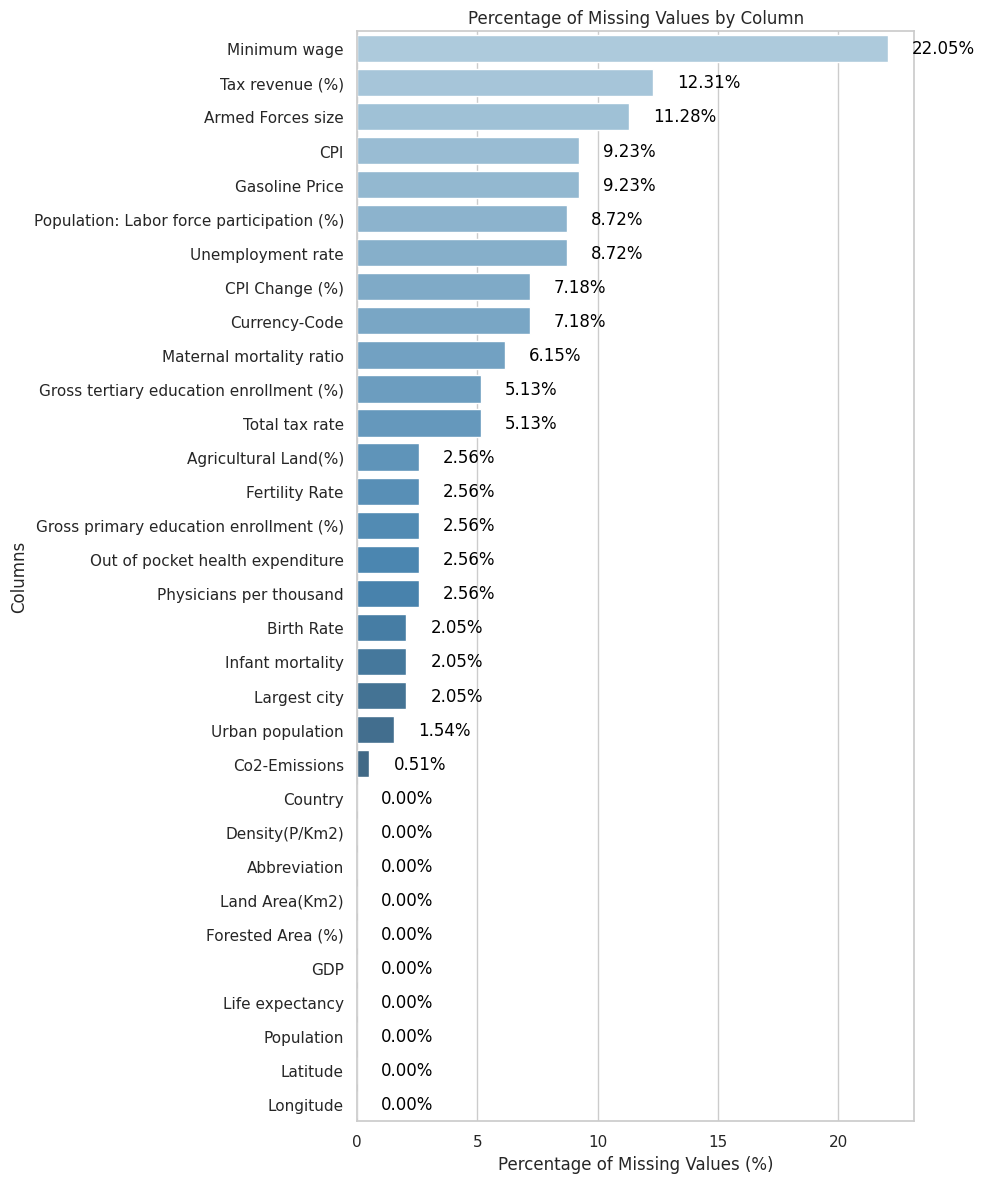

In [23]:
from matplotlib.axes._axes import Axes
from polars.dataframe.frame import DataFrame

missing_data_summary: DataFrame = (
    cleaned_df.select(
        [
            ((pl.col(name=column).is_null().sum() / 195) * 100).alias(column)
            for column in cleaned_df.columns
        ]
    )
    .transpose(include_header=True)
    .sort(by="column_0", descending=True)
)

columns: list[str] = missing_data_summary["column"].to_list()
missing_percentages: list[str] = missing_data_summary["column_0"].to_list()

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 12))
ax: Axes = sns.barplot(x=missing_percentages, y=columns, palette="Blues_d", hue=columns)

for p in ax.patches:
    ax.text(
        x=p.get_width() + 1,
        y=p.get_y() + p.get_height() / 2,
        s=f"{p.get_width():.2f}%",
        va="center",
        ha="left",
        color="black",
    )

plt.xlabel(xlabel="Percentage of Missing Values (%)")
plt.ylabel(ylabel="Columns")
plt.title(label="Percentage of Missing Values by Column")
plt.tight_layout()
plt.show()

We have now filled in the easiest values. We will now try to fill the columns with the most missing amounts of data. Then we aim to perform regression analysis to fill the rest of the missing values.

Starting with minimum wage, we scoured the web searching for data related to wages, and we ended up with this dataset, last updated in 2024 to reflect the data of 2023 on world salaries (in USD) in [kaggle](https://www.kaggle.com/datasets/zedataweaver/global-salary-data)

This includes median, average, lowest and highest wages per country. Of which we believe median and average wages are the most relevant to our analysis. We will use this data to fill the missing information on wages and replace the minimum wage column

In [24]:
# Load salaries dataset
salaries_df: DataFrame = (
    pl.read_csv(source="../data/raw/salary_data.csv")
    .select(["country_name", "median_salary", "average_salary"])
    .rename(
        {
            "country_name": "Country",
            "median_salary": "Median Salary",
            "average_salary": "Average Salary",
        }
    )
)

salaries_df.head()

Country,Median Salary,Average Salary
str,f64,f64
"""Afghanistan""",853.74,1001.15
"""Aland Islands""",3319.24,3858.35
"""Albania""",832.84,956.92
"""Algeria""",1148.84,1308.81
"""American Samoa""",1390.0,1570.0


In [25]:
salaries_df.glimpse()

Rows: 221
Columns: 3
$ Country        <str> 'Afghanistan', 'Aland Islands', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia'
$ Median Salary  <f64> 853.74, 3319.24, 832.84, 1148.84, 1390.0, 3668.08, 284.39, 1548.15, 110.28, 1700.25
$ Average Salary <f64> 1001.15, 3858.35, 956.92, 1308.81, 1570.0, 4069.77, 314.39, 1677.78, 129.42, 1974.32



We see 221 countries, which is way more than the 195 we have in our dataset. We will check the differences between the two datasets when merging

In [26]:
countries_diff = [
    country
    for country in cleaned_df["Country"].to_list()
    if country not in salaries_df["Country"].to_list()
]
countries_diff

['The Bahamas',
 'Ivory Coast',
 'Republic of the Congo',
 'Democratic Republic of the Congo',
 'Eswatini',
 'The Gambia',
 'Republic of Ireland',
 'Israel',
 'Kuwait',
 'Federated States of Micronesia',
 'Nauru',
 'North Korea',
 'North Macedonia',
 'South Korea',
 'South Sudan',
 'Tuvalu']

In [27]:
reversed_countries_diff: list[str] = [
    country
    for country in salaries_df["Country"].to_list()
    if country not in cleaned_df["Country"].to_list()
]
reversed_countries_diff

['Aland Islands',
 'American Samoa',
 'Aruba',
 'Bahamas',
 'Bermuda',
 'British Indian Ocean Territory',
 'Cayman Islands',
 'Congo',
 'Congo Democratic Republic',
 'Cook Islands',
 'Cote Divoire',
 'Faroe Islands',
 'French Guiana',
 'French Polynesia',
 'Gambia',
 'Gibraltar',
 'Greenland',
 'Guadeloupe',
 'Guam',
 'Guernsey',
 'Hong Kong',
 'Ireland',
 'Jersey',
 'Korea (North)',
 'Korea (South)',
 'Macao',
 'Macedonia',
 'Martinique',
 'Mayotte',
 'Micronesia',
 'Montserrat',
 'Netherlands Antilles',
 'New Caledonia',
 'Northern Mariana Islands',
 'Palestine',
 'Puerto Rico',
 'Reunion',
 'Saint Martin',
 'Swaziland',
 'Taiwan',
 'Turks and Caicos Islands',
 'Virgin Islands (British)',
 'Virgin Islands (US)',
 'Western Sahara']

The identified matches (by chatgpt) are:

| Salaries DF                         | Original DF                        |
|-------------------------------------|------------------------------------|
| Bahamas                             | The Bahamas                        |
| Cote Divoire                        | Ivory Coast                        |
| Congo                               | Republic of the Congo              |
| Congo Democratic Republic           | Democratic Republic of the Congo   |
| Swaziland                           | Eswatini                           |
| Gambia                              | The Gambia                         |
| Ireland                             | Republic of Ireland                |
| Korea (North)                       | North Korea                        |
| Korea (South)                       | South Korea                        |
| Macedonia                           | North Macedonia                    |
| Micronesia                          | Federated States of Micronesia     |

These countries from the second list have **no direct equivalent** in the first list:
- Israel
- Kuwait
- Nauru
- South Sudan
- Tuvalu

In [28]:
# Replace countries names based on the mapping
mapping: dict[str, str] = {
    "Bahamas": "The Bahamas",
    "Cote Divoire": "Ivory Coast",
    "Congo": "Republic of the Congo",
    "Congo Democratic Republic": "Democratic Republic of the Congo",
    "Swaziland": "Eswatini",
    "Gambia": "The Gambia",
    "Ireland": "Republic of Ireland",
    "Korea (North)": "North Korea",
    "Korea (South)": "South Korea",
    "Macedonia": "North Macedonia",
    "Micronesia": "Federated States of Micronesia",
}

salaries_df: DataFrame = salaries_df.with_columns(
    pl.when(pl.col(name="Country").is_in(other=list(mapping.keys())))
    .then(
        statement=pl.col(name="Country").map_elements(
            lambda x: mapping.get(x), return_dtype=pl.Utf8
        )
    )
    .otherwise(statement=pl.col(name="Country"))
    .alias(name="Country")
)
salaries_df.select(["Country"]).filter(
    pl.col("Country").is_in(other=list(mapping.values()))
)

Country
str
"""The Bahamas"""
"""Republic of the Congo"""
"""Democratic Republic of the Con…"
"""Ivory Coast"""
"""The Gambia"""
…
"""North Korea"""
"""South Korea"""
"""North Macedonia"""


Finally, we obtained from [salarymonitor](https://salarymonitor.org) the missing values.

We reflect the median and average salaries obtained for the relevant countries in our analysis since the website went down. In order to keep the data available in this document, we explicitly write these values here.

Israel:
- Median: $2,814
- Average: $3,608

Kuwait:
- Median: $2,361
- Average: $3,027

Tuvalu:
- Median: $292
- Average: $375

Nauru:
- Median: $487
- Average: $625

South Sudan:
- Median: $130
- Average: $167

In [29]:
additional_salary_avg_mapping: dict[str, float] = {
    "Israel": 3608.0,
    "Kuwait": 3027.0,
    "Tuvalu": 375.0,
    "Nauru": 625.0,
    "South Sudan": 167.0,
}

additional_salary_median_mapping: dict[str, float] = {
    "Israel": 2814.0,
    "Kuwait": 2361.0,
    "Tuvalu": 292.0,
    "Nauru": 487.0,
    "South Sudan": 130.0,
}

# Merge the datasets
cleaned_df.drop_in_place("Minimum wage")
cleaned_df: DataFrame = cleaned_df.join(other=salaries_df, on="Country", how="left")

cleaned_df.select(["Country", "Average Salary", "Median Salary"]).count()

Country,Average Salary,Median Salary
u32,u32,u32
193,188,188


In [30]:
cleaned_df: DataFrame = cleaned_df.with_columns(
    pl.when(pl.col(name="Average Salary").is_null())
    .then(
        statement=pl.col(name="Country").map_elements(
            lambda x: additional_salary_avg_mapping.get(x), return_dtype=pl.Float64
        )
    )
    .otherwise(statement=pl.col(name="Average Salary"))
    .alias(name="Average Salary"),
    pl.when(pl.col(name="Median Salary").is_null())
    .then(
        statement=pl.col(name="Country").map_elements(
            lambda x: additional_salary_median_mapping.get(x), return_dtype=pl.Float64
        )
    )
    .otherwise(statement=pl.col(name="Median Salary"))
    .alias(name="Median Salary"),
)

cleaned_df.select(["Country", "Average Salary", "Median Salary"]).filter(
    pl.col("Country").is_in(other=list(additional_salary_avg_mapping.keys()))
)

Country,Average Salary,Median Salary
str,f64,f64
"""Israel""",3608.0,2814.0
"""Kuwait""",3027.0,2361.0
"""Nauru""",625.0,487.0
"""South Sudan""",167.0,130.0
"""Tuvalu""",375.0,292.0


In [31]:
cleaned_df.select(["Country", "Average Salary", "Median Salary"]).null_count()

Country,Average Salary,Median Salary
u32,u32,u32
0,0,0


#### Regression analysis to fill nulls

At this point we find necessary to revise the importance of the rest of columns in the dataset with respect to the questions we aim to answer as to decide how we will fill the rest of the values. For that we will use the following criteria:
- First we create a correlation matrix to see how the columns relate to each other
- Then, for columns that do not surpass the set thresshold will be filled by regression analysis
- For the rest of the columns, we will fill them with the most recent data we can find

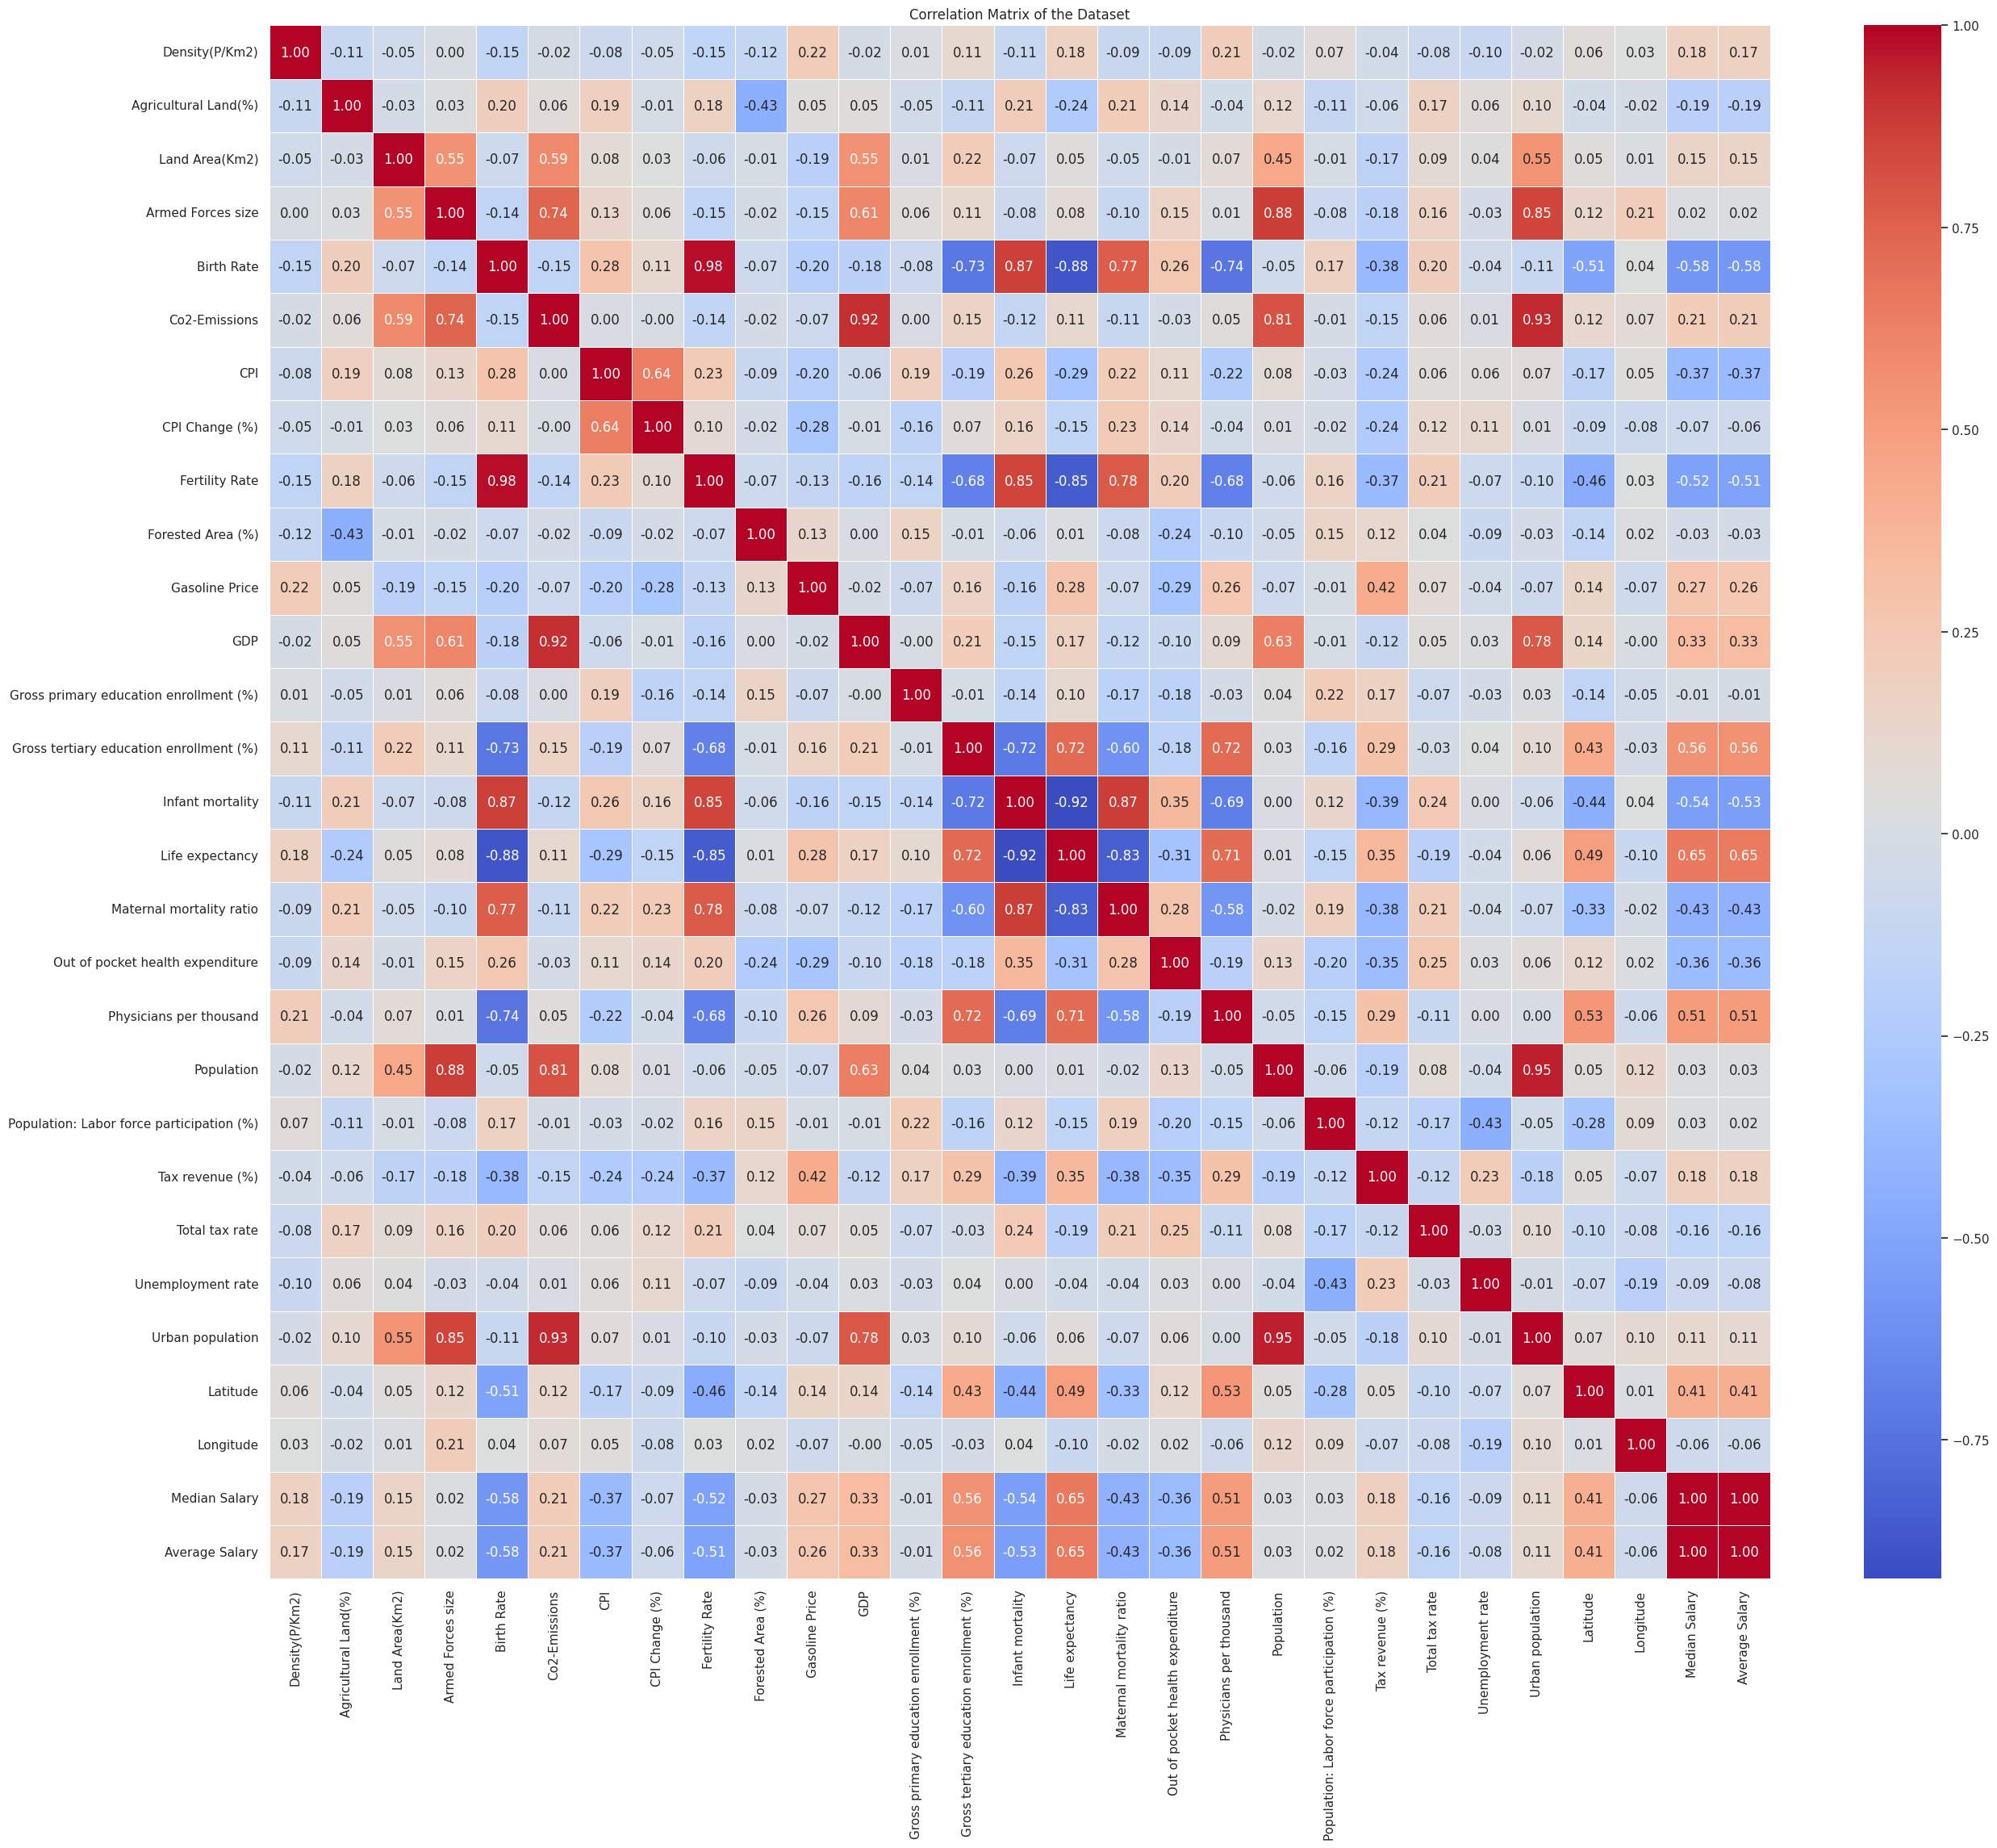

In [32]:
from pandas.core.frame import DataFrame
from polars.dataframe.frame import DataFrame

object_cols: list[str] = ["Country", "Abbreviation", "Currency-Code", "Largest city"]

correlation_df: DataFrame = cleaned_df.drop(object_cols)

# Calculate the correlation matrix
correlation_matrix: DataFrame = correlation_df.to_pandas().corr()

# Set up the matplotlib figure
plt.figure(figsize=(30, 25))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    data=correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5
)

# Set the title
plt.title(label="Correlation Matrix of the Dataset")

# Show the plot
plt.show()

For starters, it looks like there is an almost 1:1 relation between median and average salary. We did not expect that, but we will remove average because it has slightly less correlation with the rest of the columns.

Birth rate and fertility rate are also highly correlated. However Birth rate seems to have a grater correlation with other variables. So we will keep the first. These however are mostly correlated with columns missing more values so its imputed values will probably not be very accurate.

Co2, population and GDP are also higly correlated but since their meaning is very distinct we will keep them all. Although it is good news to see Co2 having high correlation with other values meaning it could be confidently filled with regression analysis.

Since it would be quite verbose to lay out all the highly correlated column we will go over all with missing values and state our confidence to fill then with regresion analysis. Those with low confidence we will contemplate whether we should discard them. If we don't we will take in account when drawing conclussions related to low confidence columns that the obtained results may be biased.
- **Tax revenue:** <span style="color: yellow;">Mid confidence</span>. It has many correlations around 40-50% but nothing too high. Note how curious it is that tax revenue and total tax rate are not very correlated.
- **Armed forces size:** <span style="color: green;">High confidence</span>. Many columns with higher than 0.75 correlation
- **CPI and CPI Change:** <span style="color: red;">Low confidence</span>. Very low correlation with other columns, and countries missing CPI are most likely missing CPI Change as well.
- **Gasoline Price:** <span style="color: red;">Low confidence</span>
- **Labor force participation:** <span style="color: red;">Low confidence</span>
- **Unemployment rate:** <span style="color: red;">Low confidence</span>. Curiously the most correlated column is labor force participation, although we are not sure what to make of it.
- **Currency-Code:** This will be removed most probably. It also categorical and cannot be inferred by regression
- **Maternal mortality ratio:** <span style="color: red;">Low confidence</span>
- **Gross tertiary education enrollment:** <span style="color: green;">High confidence</span>
- **Agricultural land:** <span style="color: yellow;">Mid confidence</span>
- **Co2-Emissions:** <span style="color: green;">High confidence</span>
- **Fertility rate:** Already discussed, <span style="color: red;">Low confidence</span>
- **Gross primary education enrollment:** <span style="color: red;">Low confidence</span>
- **Out of pocket health expenditure:** <span style="color: red;">Low confidence</span>
- **Physicians per thousand:** <span style="color: green;">High confidence</span>
- **Birth Rate:** Already discussed, <span style="color: green;">High confidence</span>
- **Infant mortality:** <span style="color: green;">High confidence</span>
- **Largest city:** Irrelevant data. To be deleted
- **Urban population:** <span style="color: green;">High confidence</span>



Note that before doing any correlation analysis we must delete those column directly related with our questions. Those being life expectacy for the moment. If at any point it changes we would run these cells again with a different or extra column being removed

In [33]:
# First we remove those columns we will discard in any further analysis
# - Largest city
# - Currency-Code
# - Average Salary
cleaned_df: DataFrame = cleaned_df.drop(
    ["Largest city", "Currency-Code", "Average Salary"]
)
cleaned_df.head()

Country,Density(P/Km2),Abbreviation,Agricultural Land(%),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban population,Latitude,Longitude,Median Salary
str,i64,str,f64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,i64,f64,f64,f64,f64,i64,f64,f64,f64
"""Afghanistan""",60,"""AF""",58.1,652230,323000,32.49,8672.0,149.9,2.3,4.47,2.1,0.7,1.9101e10,104.0,9.7,47.9,64.5,638,78.4,0.28,38041754,48.9,9.3,71.4,11.12,9797273,33.93911,67.709953,853.74
"""Albania""",105,"""AL""",43.1,28748,9000,11.78,4536.0,119.05,1.4,1.62,28.1,1.36,1.5278e10,107.0,55.0,7.8,78.5,15,56.9,1.2,2854191,55.7,18.6,36.6,12.33,1747593,41.153332,20.168331,832.84
"""Algeria""",18,"""DZ""",17.4,2381741,317000,24.28,150006.0,151.36,2.0,3.02,0.8,0.28,1.6999e11,109.9,51.4,20.1,76.7,112,28.1,1.72,43053054,41.2,37.2,66.1,11.7,31510100,28.033886,1.659626,1148.84
"""Andorra""",164,"""AD""",40.0,468,null,7.2,469.0,null,null,1.27,34.0,1.51,3.1541e9,106.4,null,2.7,84.04,null,36.4,3.33,77142,null,null,null,null,67873,42.506285,1.521801,3668.08
"""Angola""",26,"""AO""",47.5,1246700,117000,40.73,34693.0,261.73,17.1,5.52,46.3,0.97,9.4635e10,113.5,9.3,51.6,60.8,241,33.4,0.21,31825295,77.5,9.2,49.1,6.89,21061025,-11.202692,17.873887,284.39


In [34]:
# Remove the columns that are not needed for the analysis:
# - Country
# - Abbreviation
# - Life expectancy
# - Any low confidence column
imputed_df: DataFrame = cleaned_df.drop(
    ["Country", "Abbreviation", "Life expectancy"]
).to_pandas()
imputed_df.head()

,Density(P/Km2),Agricultural Land(%),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),...,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban population,Latitude,Longitude,Median Salary
0,60,58.1,652230,323000.0,32.49,8672.0,149.90,2.3,4.47,2.1,...,0.28,38041754,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953,853.74
1,105,43.1,28748,9000.0,11.78,4536.0,119.05,1.4,1.62,28.1,...,1.20,2854191,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331,832.84
2,18,17.4,2381741,317000.0,24.28,150006.0,151.36,2.0,3.02,0.8,...,1.72,43053054,41.2,37.2,66.1,11.70,31510100.0,28.033886,1.659626,1148.84
3,164,40.0,468,NaN,7.20,469.0,NaN,NaN,1.27,34.0,...,3.33,77142,NaN,NaN,NaN,NaN,67873.0,42.506285,1.521801,3668.08
4,26,47.5,1246700,117000.0,40.73,34693.0,261.73,17.1,5.52,46.3,...,0.21,31825295,77.5,9.2,49.1,6.89,21061025.0,-11.202692,17.873887,284.39


Now its time to go a bit deeper into the regression analysis to fill missing values. We will use [Multivariable Imputation by Chained Equations](http://www.jstor.org/stable/2984099), which is an extensively tested method for imputing missing values in datasets. We will use the `MICE` implementation from the `sklearn` library.

In [35]:
imputer = IterativeImputer(max_iter=10, random_state=0)

imputed_values = imputer.fit_transform(imputed_df)

imputed_df = pd.DataFrame(
    imputed_values, index=imputed_df.index, columns=imputed_df.columns
)
imputed_df.head()

,Density(P/Km2),Agricultural Land(%),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),...,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban population,Latitude,Longitude,Median Salary
0,60.0,58.1,652230.0,323000.000000,32.49,8672.0,149.900000,2.300000,4.47,2.1,...,0.28,38041754.0,48.90000,9.300000,71.400000,11.120000,9797273.0,33.939110,67.709953,853.74
1,105.0,43.1,28748.0,9000.000000,11.78,4536.0,119.050000,1.400000,1.62,28.1,...,1.20,2854191.0,55.70000,18.600000,36.600000,12.330000,1747593.0,41.153332,20.168331,832.84
2,18.0,17.4,2381741.0,317000.000000,24.28,150006.0,151.360000,2.000000,3.02,0.8,...,1.72,43053054.0,41.20000,37.200000,66.100000,11.700000,31510100.0,28.033886,1.659626,1148.84
3,164.0,40.0,468.0,45891.309773,7.20,469.0,144.879813,8.811619,1.27,34.0,...,3.33,77142.0,62.61806,19.248343,39.426858,6.042134,67873.0,42.506285,1.521801,3668.08
4,26.0,47.5,1246700.0,117000.000000,40.73,34693.0,261.730000,17.100000,5.52,46.3,...,0.21,31825295.0,77.50000,9.200000,49.100000,6.890000,21061025.0,-11.202692,17.873887,284.39


We are now going to see how much variation there is in the distribution of the data between the columns. If there is too much we will see which countries did not have that data and try to reason why this happened.

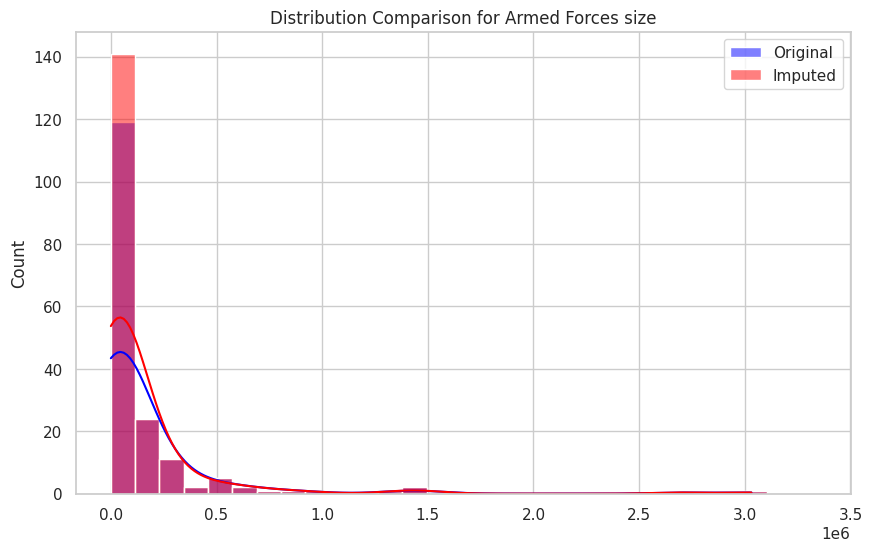

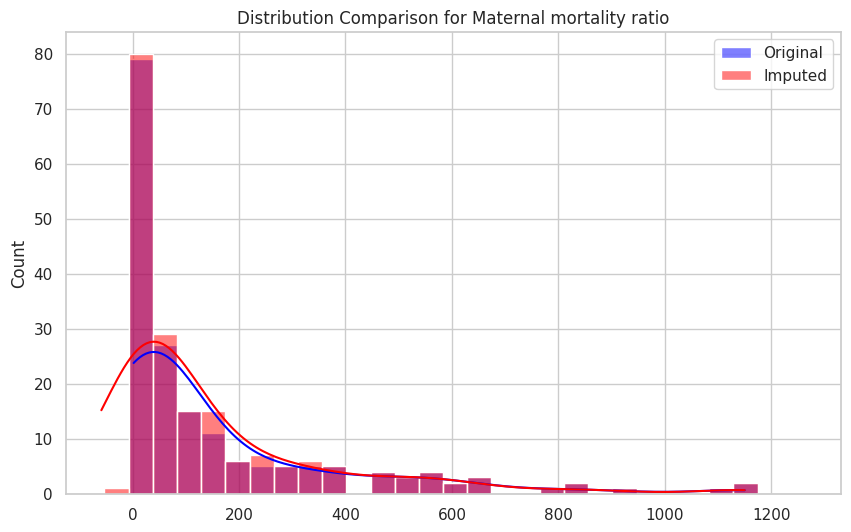

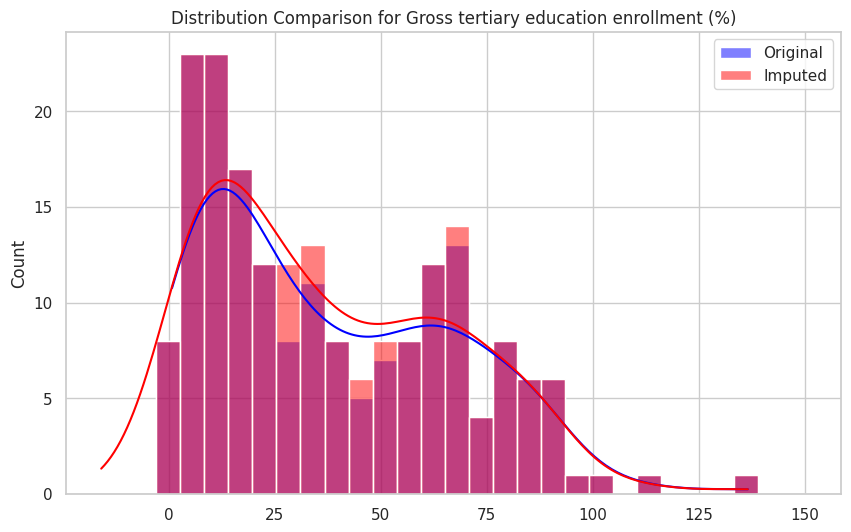

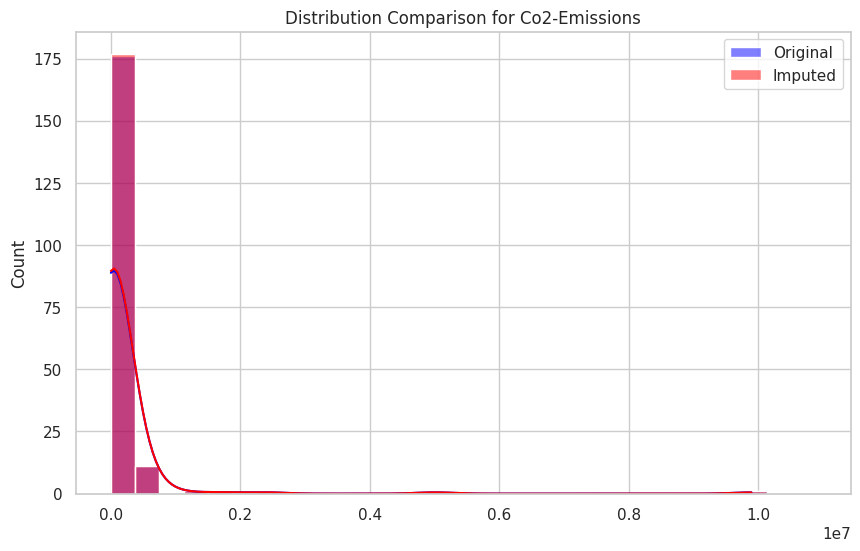

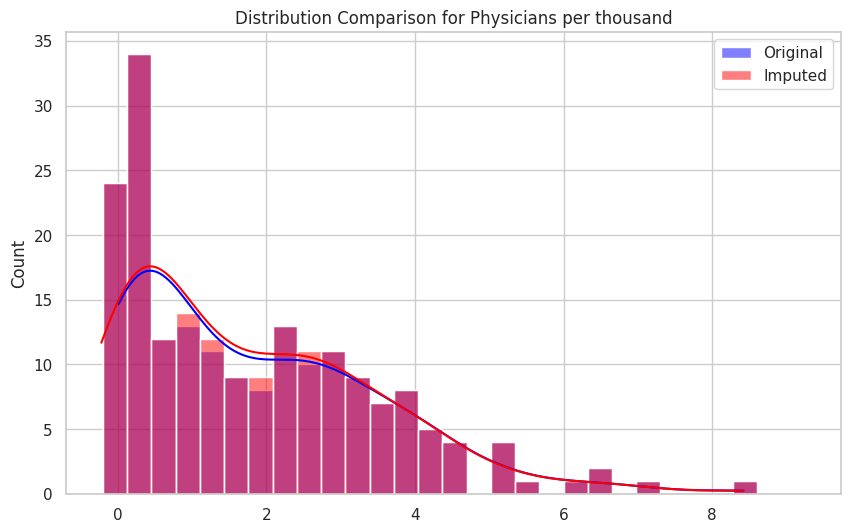

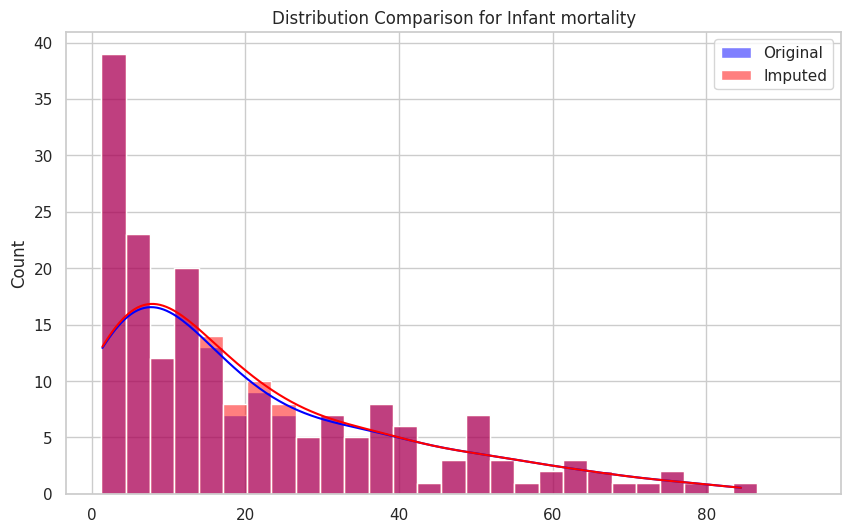

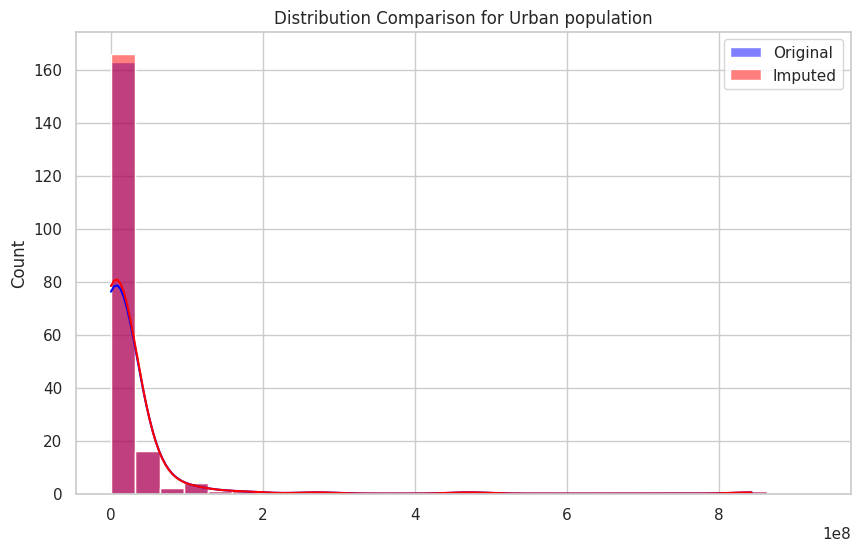

In [36]:
high_conf_columns: list[str] = [
    "Armed Forces size",
    "Maternal mortality ratio",
    "Gross tertiary education enrollment (%)",
    "Co2-Emissions",
    "Physicians per thousand",
    "Infant mortality",
    "Urban population",
]

imputed_df: DataFrame = pl.from_pandas(imputed_df)


# Distribution Comparison
def plot_distribution_comparison(original, imputed, column):
    plt.figure(figsize=(10, 6))
    min_value = min(original[column].min(), imputed[column].min()) * 0.9
    max_value = max(original[column].max(), imputed[column].max()) * 1.1
    bins = np.linspace(min_value, max_value, 30)
    sns.histplot(original[column], bins=bins, color="blue", label="Original", kde=True)
    sns.histplot(imputed[column], bins=bins, color="red", label="Imputed", kde=True)
    plt.title(f"Distribution Comparison for {column}")
    plt.legend()
    plt.show()


for column in high_conf_columns:
    plot_distribution_comparison(cleaned_df, imputed_df, column)

We see distribution is mostly the same, although it seems that for some columns there are certainly some values that were prefered over others. For armed forces 0 was the mostly prefered value for countries, which is a bit sus. We will see which countries did not have this data and try to reason why this happened by looking at its most correlated column and geographical factors.

In [37]:
missing_armed_forces: DataFrame = cleaned_df.filter(
    pl.col(name="Armed Forces size").is_null()
)
missing_armed_forces.select(["Country", "Armed Forces size", "Population"])

Country,Armed Forces size,Population
str,i64,i64
"""Andorra""",null,77142
"""Comoros""",null,850886
"""Dominica""",null,71808
"""Eswatini""",null,1093238
"""Grenada""",null,112003
…,…,…
"""San Marino""",null,33860
"""Solomon Islands""",null,669823
"""Tonga""",null,100209


From the high variation of population, we will for now assume that the confidence of accuracy of the imputed values is low. We will take this into account when drawing conclusions.
- **Armed Forces size:** <span style="color: red;">Low confidence</span> <- New Confidence Value

And just out of curiosity we will do the same for low confidence columns to be filled

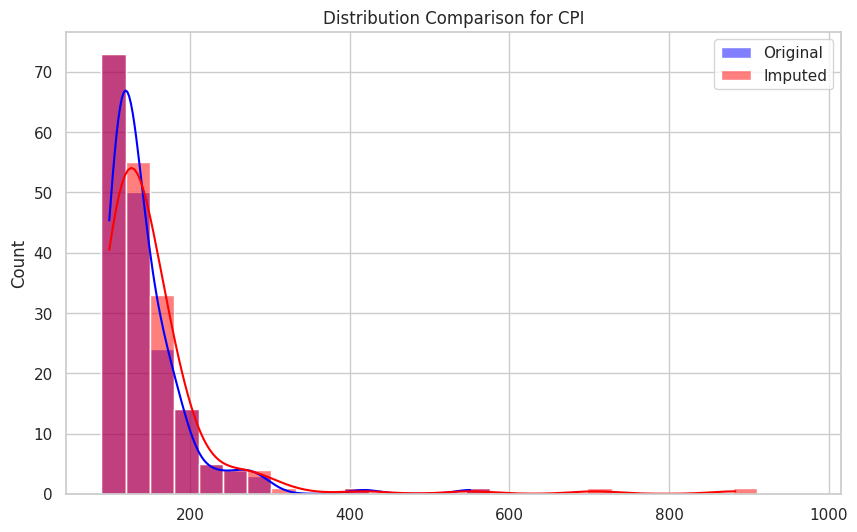

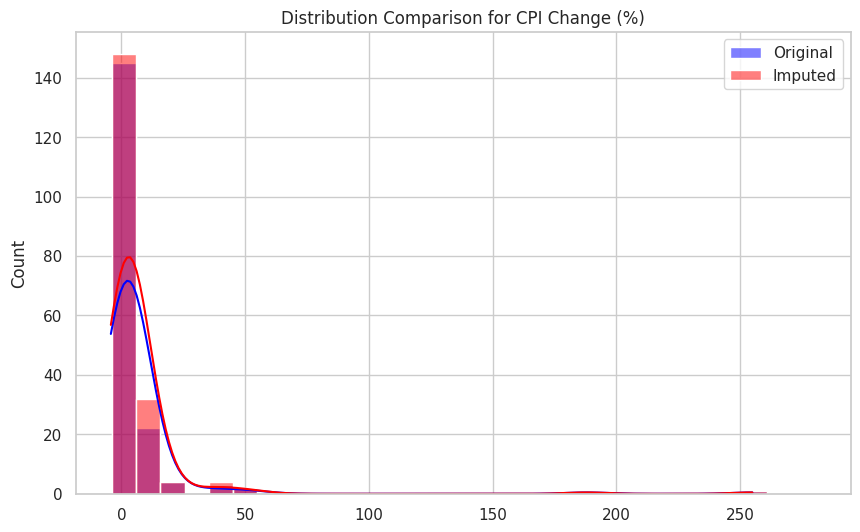

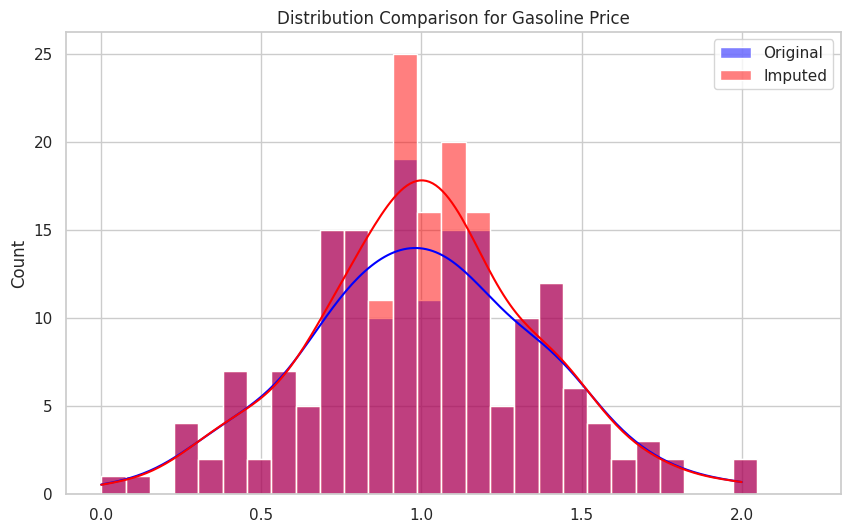

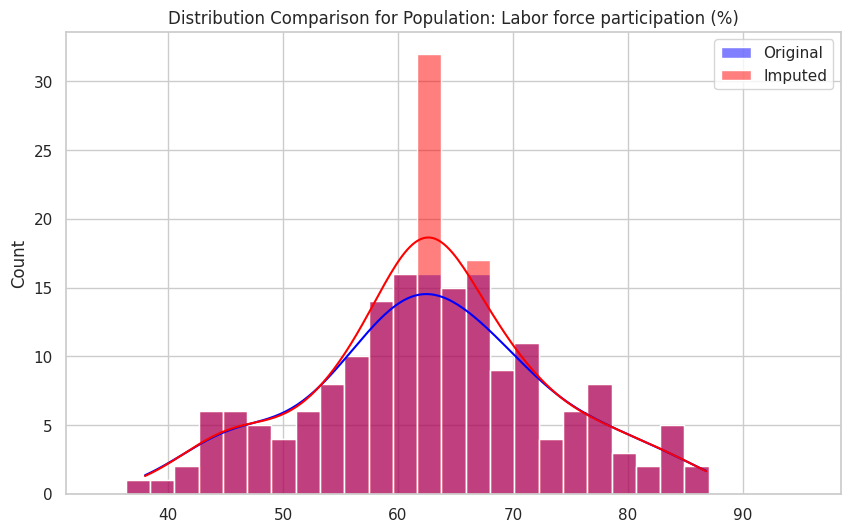

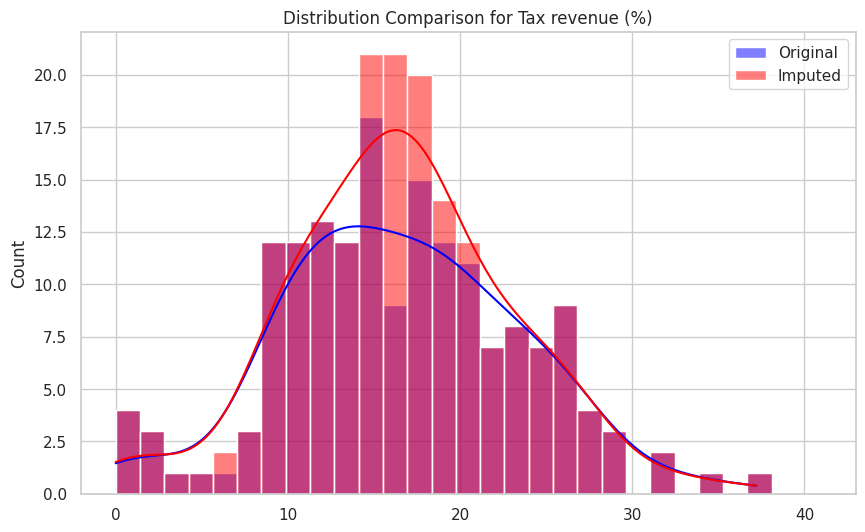

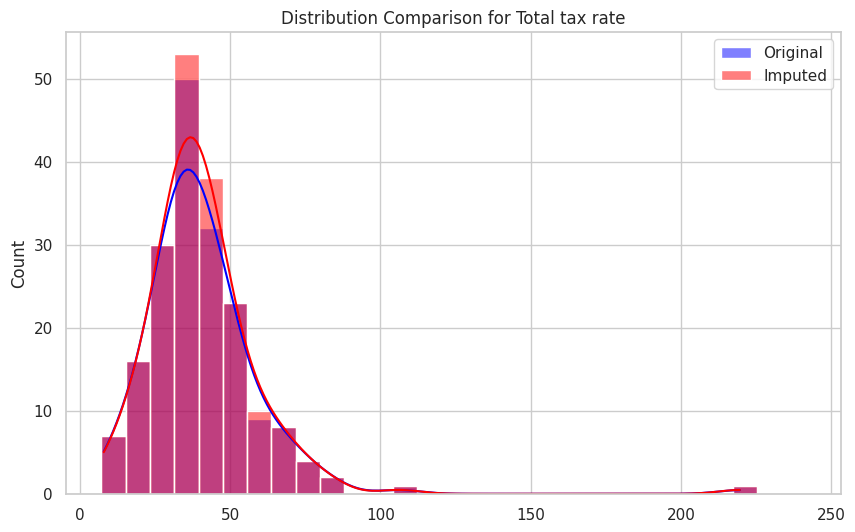

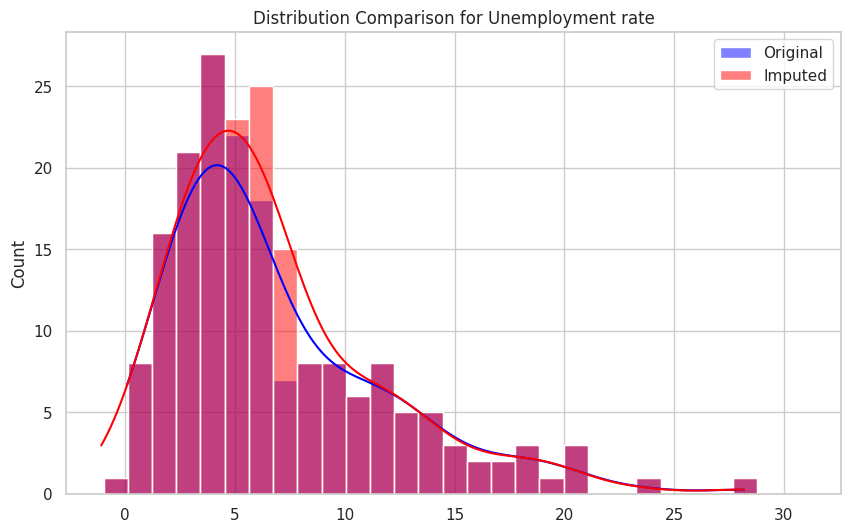

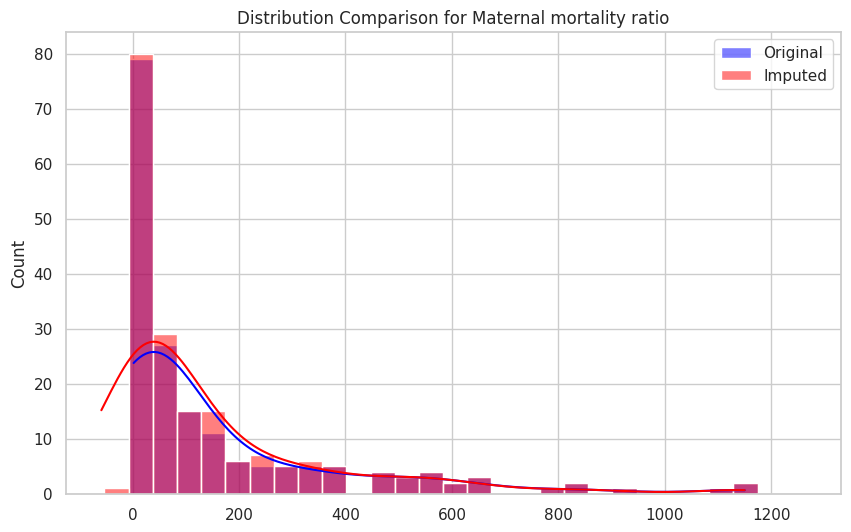

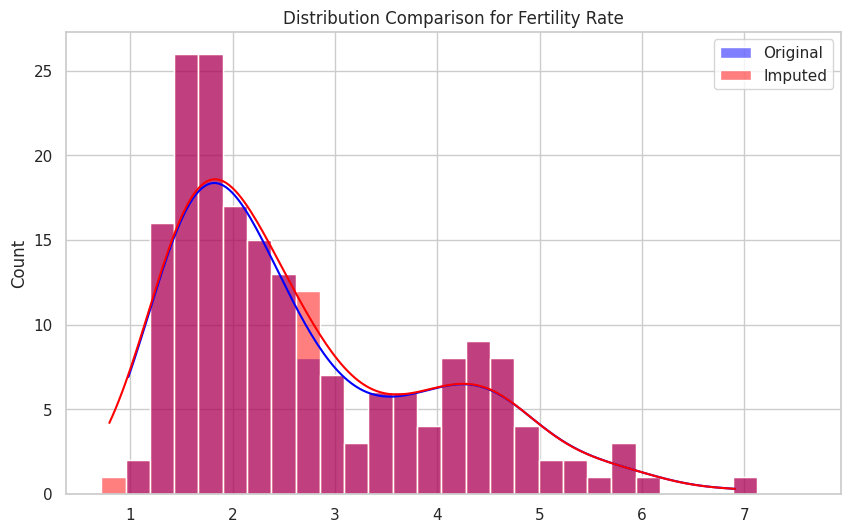

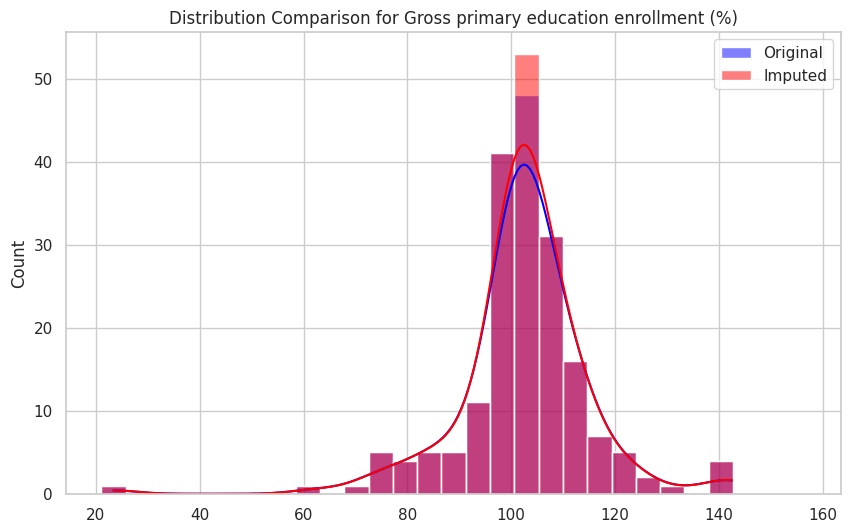

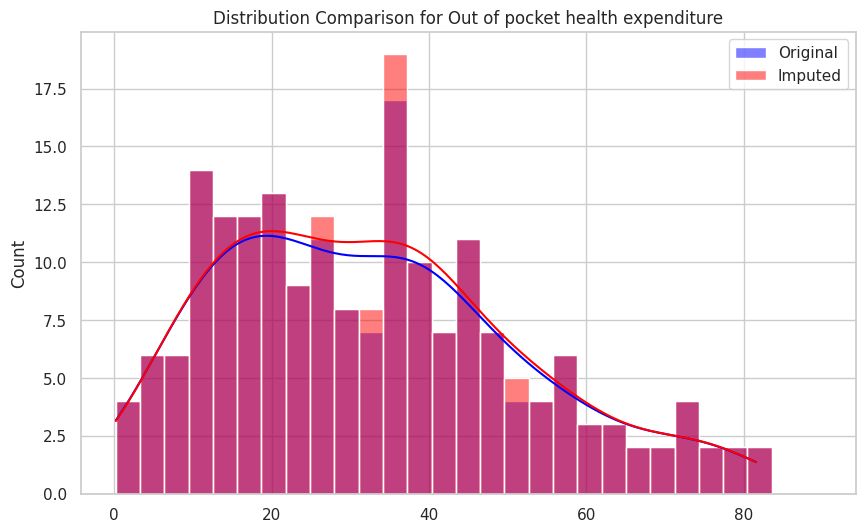

In [38]:
low_conf_columns: list[str] = [
    "CPI",
    "CPI Change (%)",
    "Gasoline Price",
    "Population: Labor force participation (%)",
    "Tax revenue (%)",
    "Total tax rate",
    "Unemployment rate",
    "Maternal mortality ratio",
    "Fertility Rate",
    "Gross primary education enrollment (%)",
    "Out of pocket health expenditure",
]

for column in low_conf_columns:
    plot_distribution_comparison(cleaned_df, imputed_df, column)

In [39]:
# We can do this beacuase index is preserved
cleaned_df = cleaned_df.with_columns(
    [
        pl.when(pl.col(name=column).is_null())
        .then(statement=imputed_df[column])
        .otherwise(statement=pl.col(name=column))
        .alias(name=column)
        for column in imputed_df.columns
    ]
)
cleaned_df

Country,Density(P/Km2),Abbreviation,Agricultural Land(%),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban population,Latitude,Longitude,Median Salary
str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""Afghanistan""",60.0,"""AF""",58.1,652230.0,323000.0,32.49,8672.0,149.9,2.3,4.47,2.1,0.7,1.9101e10,104.0,9.7,47.9,64.5,638.0,78.4,0.28,3.8041754e7,48.9,9.3,71.4,11.12,9.797273e6,33.93911,67.709953,853.74
"""Albania""",105.0,"""AL""",43.1,28748.0,9000.0,11.78,4536.0,119.05,1.4,1.62,28.1,1.36,1.5278e10,107.0,55.0,7.8,78.5,15.0,56.9,1.2,2.854191e6,55.7,18.6,36.6,12.33,1.747593e6,41.153332,20.168331,832.84
"""Algeria""",18.0,"""DZ""",17.4,2.381741e6,317000.0,24.28,150006.0,151.36,2.0,3.02,0.8,0.28,1.6999e11,109.9,51.4,20.1,76.7,112.0,28.1,1.72,4.3053054e7,41.2,37.2,66.1,11.7,3.15101e7,28.033886,1.659626,1148.84
"""Andorra""",164.0,"""AD""",40.0,468.0,45891.309773,7.2,469.0,144.879813,8.811619,1.27,34.0,1.51,3.1541e9,106.4,52.571064,2.7,84.04,-38.781091,36.4,3.33,77142.0,62.61806,19.248343,39.426858,6.042134,67873.0,42.506285,1.521801,3668.08
"""Angola""",26.0,"""AO""",47.5,1.2467e6,117000.0,40.73,34693.0,261.73,17.1,5.52,46.3,0.97,9.4635e10,113.5,9.3,51.6,60.8,241.0,33.4,0.21,3.1825295e7,77.5,9.2,49.1,6.89,2.1061025e7,-11.202692,17.873887,284.39
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Venezuela""",32.0,"""VE""",24.5,912050.0,343000.0,17.88,164175.0,883.084262,254.9,2.27,52.7,0.0,4.8236e11,97.2,79.3,21.4,72.1,125.0,45.8,1.92,2.8515829e7,59.7,17.968433,73.3,8.8,2.5162368e7,6.42375,-66.58973,3282.02
"""Vietnam""",314.0,"""VN""",39.3,331210.0,522000.0,16.75,192668.0,163.52,2.8,2.05,48.1,0.8,2.6192e11,110.6,28.5,16.5,75.3,43.0,43.5,0.82,9.6462106e7,77.4,19.1,37.6,2.01,3.533214e7,14.058324,108.277199,612.57
"""Yemen""",56.0,"""YE""",44.6,527968.0,40000.0,30.45,10609.0,157.58,8.1,3.79,1.0,0.92,2.6914e10,93.6,10.2,42.9,66.1,164.0,81.0,0.31,2.9161922e7,38.0,15.539173,26.6,12.91,1.0869523e7,15.552727,48.516388,120.98


For a few exceptions, we can see our expectations match a high variation of the data distribution. But even when it doesn't this does not mean that the data inserted is correct. We still believe that we cannot be confident due to the low correlation of the columns with other columns

### Diet data

Before goign into the questions we will add a final piece of data, which is dietary data. In particular it will be average calories per person per food type, which was obtained from **TODO**. This data however only contains data up to 2021. We will first treat the data and then disscusss how we will use integrate it into our dataset and why.

In [40]:
calories_df: DataFrame = pl.read_csv(source="../data/raw/caloric_data.csv")
calories_df.head()

Entity,Code,Year,Daily calorie supply per person from other commodities,Daily calorie supply per person from alcoholic beverages,Daily calorie supply per person from sugar,Daily calorie supply per person from oils and fats,Daily calorie supply per person from meat,Daily calorie supply per person from dairy and eggs,Daily calorie supply per person from fruits and vegetables,Daily calorie supply per person from starchy roots,Daily calorie supply per person from pulses,Daily calorie supply per person from cereals and grains
str,str,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""Afghanistan""","""AFG""",1961,12.223696,0.0,51.95071,93.715004,90.65908,103.90141,83.52859,25.466034,16.298262,2576.144
"""Afghanistan""","""AFG""",1962,13.250671,0.0,45.86771,99.88968,90.71613,102.947525,77.46546,22.424213,17.3278,2505.3962
"""Afghanistan""","""AFG""",1963,13.259131,0.0,47.93686,108.112915,92.81392,112.19265,80.57472,23.458462,17.338863,2257.112
"""Afghanistan""","""AFG""",1964,14.286554,0.0,56.125748,104.08775,94.90354,112.251495,96.94447,24.491236,18.368427,2494.0242
"""Afghanistan""","""AFG""",1965,14.292503,0.0,58.190907,107.19377,96.98485,120.465385,96.98485,24.501434,18.376076,2481.7913


In [41]:
calories_df = calories_df.filter(pl.col("Year").is_in(range(2000, 2024)))

As we know countries may not align 1:1 so lets check the country codes differences

In [42]:
set(calories_df["Entity"].unique().to_list()) - set(cleaned_df["Country"].to_list())

{'Africa',
 'Africa (FAO)',
 'Americas (FAO)',
 'Asia',
 'Asia (FAO)',
 'Bahamas',
 'Bermuda',
 'Caribbean (FAO)',
 'Central America (FAO)',
 'Central Asia (FAO)',
 'China (FAO)',
 'Congo',
 "Cote d'Ivoire",
 'Czechia',
 'Democratic Republic of Congo',
 'Eastern Africa (FAO)',
 'Eastern Asia (FAO)',
 'Eastern Europe (FAO)',
 'Europe',
 'Europe (FAO)',
 'European Union (27)',
 'European Union (27) (FAO)',
 'French Polynesia',
 'Gambia',
 'High-income countries',
 'Hong Kong',
 'Ireland',
 'Land Locked Developing Countries (FAO)',
 'Least Developed Countries (FAO)',
 'Low Income Food Deficit Countries (FAO)',
 'Low-income countries',
 'Lower-middle-income countries',
 'Macao',
 'Micronesia (FAO)',
 'Micronesia (country)',
 'Middle Africa (FAO)',
 'Net Food Importing Developing Countries (FAO)',
 'Netherlands Antilles',
 'New Caledonia',
 'North America',
 'Northern Africa (FAO)',
 'Northern America (FAO)',
 'Northern Europe (FAO)',
 'Oceania',
 'Oceania (FAO)',
 'Serbia and Montenegro',


There seems to be entities which are not countries. Let's deal with those first

In [43]:
calories_df_countries = calories_df.filter(
    pl.col("Code").is_not_null() | pl.col("Code").str.contains("OWID")
)
calories_df_countries["Entity"].unique().count()

190

There seems to be some countries which we will need to put data in. For which we will use the corresponding region from the original dataset

In [44]:
calories_df_countries.null_count()

Entity,Code,Year,Daily calorie supply per person from other commodities,Daily calorie supply per person from alcoholic beverages,Daily calorie supply per person from sugar,Daily calorie supply per person from oils and fats,Daily calorie supply per person from meat,Daily calorie supply per person from dairy and eggs,Daily calorie supply per person from fruits and vegetables,Daily calorie supply per person from starchy roots,Daily calorie supply per person from pulses,Daily calorie supply per person from cereals and grains
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,26,0,0,0,0,0,0,10,0


In [45]:
calories_df_countries.filter(
    pl.col("Daily calorie supply per person from alcoholic beverages").is_null()
).select(["Entity"]).unique()

Entity
str
"""United Arab Emirates"""
"""Saudi Arabia"""


Well those 3 have alcohol banned, so we can fill the values with 0

In [46]:
calories_df_countries = calories_df_countries.with_columns(
    pl.when(
        (pl.col("Entity") == "United Arab Emirates")
        | (pl.col("Entity") == "Saudi Arabia")
    )
    .then(statement=0.0)
    .otherwise(
        statement=pl.col("Daily calorie supply per person from alcoholic beverages")
    )
    .alias("Daily calorie supply per person from alcoholic beverages")
)
calories_df_countries.filter(
    pl.col("Daily calorie supply per person from alcoholic beverages").is_null()
).select(["Entity"]).unique()

Entity
str


In [47]:
calories_df_countries.filter(
    pl.col("Daily calorie supply per person from pulses").is_null()
).select(["Entity", "Year"]).unique()

Entity,Year
str,i64
"""Turkmenistan""",2005
"""Turkmenistan""",2003
"""Turkmenistan""",2004
"""Turkmenistan""",2007
"""Turkmenistan""",2000
"""Turkmenistan""",2008
"""Turkmenistan""",2002
"""Turkmenistan""",2009
"""Turkmenistan""",2001


In this case there is data from 2010 onwards, so if needed we could use that data only

Lets check the country diff

In [48]:
# Countries in calories df not in cleaned df
set(calories_df_countries["Entity"].unique().to_list()) - set(
    cleaned_df["Country"].to_list()
)

{'Bahamas',
 'Bermuda',
 'Congo',
 "Cote d'Ivoire",
 'Czechia',
 'Democratic Republic of Congo',
 'French Polynesia',
 'Gambia',
 'Hong Kong',
 'Ireland',
 'Macao',
 'Micronesia (country)',
 'Netherlands Antilles',
 'New Caledonia',
 'Serbia and Montenegro',
 'Taiwan',
 'World'}

In [49]:
# Countries in cleaned df not in calories df
set(cleaned_df["Country"].to_list()) - set(
    calories_df_countries["Entity"].unique().to_list()
)

{'Andorra',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Equatorial Guinea',
 'Eritrea',
 'Federated States of Micronesia',
 'Ivory Coast',
 'Liechtenstein',
 'Marshall Islands',
 'Monaco',
 'Palau',
 'Republic of Ireland',
 'Republic of the Congo',
 'San Marino',
 'Singapore',
 'Somalia',
 'The Bahamas',
 'The Gambia',
 'Tonga',
 'Tuvalu'}

In [50]:
mappings: dict[str, str] = {
    "Bahamas": "The Bahamas",
    "Congo": "Republic of the Congo",
    "Cote d'Ivoire": "Ivory Coast",
    "Czechia": "Czech Republic",
    "Democratic Republic of Congo": "Democratic Republic of the Congo",
    "Micronesia (country)": "Federated States of Micronesia",
    "Gambia": "The Gambia",
    "Ireland": "Republic of Ireland",
}

calories_df_countries: DataFrame = calories_df_countries.with_columns(
    pl.when(pl.col("Entity").is_in(other=list(mappings.keys())))
    .then(
        statement=pl.col("Entity").map_elements(
            lambda x: mappings.get(x), return_dtype=pl.Utf8
        )
    )
    .otherwise(statement=pl.col("Entity"))
    .alias("Entity")
)

set(cleaned_df["Country"].to_list()) - set(
    calories_df_countries["Entity"].unique().to_list()
)

{'Andorra',
 'Equatorial Guinea',
 'Eritrea',
 'Liechtenstein',
 'Marshall Islands',
 'Monaco',
 'Palau',
 'San Marino',
 'Singapore',
 'Somalia',
 'Tonga',
 'Tuvalu'}

In [51]:
calories_df.select(["Entity", "Code"]).unique().filter(pl.col("Code").is_null())[
    "Entity"
].to_list()

['Southern Asia (FAO)',
 'Net Food Importing Developing Countries (FAO)',
 'High-income countries',
 'Northern Europe (FAO)',
 'Oceania (FAO)',
 'Western Asia (FAO)',
 'Southern Europe (FAO)',
 'Northern America (FAO)',
 'Micronesia (FAO)',
 'Northern Africa (FAO)',
 'Americas (FAO)',
 'Oceania',
 'Eastern Europe (FAO)',
 'South America',
 'Central Asia (FAO)',
 'Western Europe (FAO)',
 'China (FAO)',
 'Lower-middle-income countries',
 'Caribbean (FAO)',
 'Low Income Food Deficit Countries (FAO)',
 'European Union (27)',
 'Central America (FAO)',
 'Asia',
 'Small Island Developing States (FAO)',
 'Western Africa (FAO)',
 'North America',
 'Least Developed Countries (FAO)',
 'Africa',
 'Southern Africa (FAO)',
 'Eastern Asia (FAO)',
 'Middle Africa (FAO)',
 'Sudan (former)',
 'Land Locked Developing Countries (FAO)',
 'Europe (FAO)',
 'European Union (27) (FAO)',
 'Upper-middle-income countries',
 'South America (FAO)',
 'Low-income countries',
 'South-eastern Asia (FAO)',
 'Eastern Afr

So the countries with no data are:
- Andorra
- Equatorial Guinea
- Eritrea
- Liechtenstein
- Marshall Islands
- Monaco
- Palau
- San Marino
- Singapore
- Somalia
- Tonga
- Tuvalu

and the non-cuntry data were:
- 'European Union (27)',
- 'North America',
- 'Asia',
- 'Low-income countries',
- 'High-income countries',
- 'Lower-middle-income countries',
- 'Upper-middle-income countries',
- 'South America',
- 'Europe',
- 'Oceania',
- 'Africa',

so the mapping will be the following:
| country | fao |
|---------|-----|
| Andorra | Western Europe (FAO) |
| Brunei | South-eastern Asia (FAO) |
| Equatorial Guinea | Middle Africa (FAO) |
| Eritrea | Eastern Africa (FAO) |
| Liechtenstein | Western Europe (FAO) |
| Marshall Islands | Micronesia (FAO) |
| Monaco | Southern Europe (FAO) |
| Palau | Micronesia (FAO) |
| San Marino | Southern Europe (FAO) |
| Singapore | South-eastern Asia (FAO) |
| Somalia | Eastern Africa (FAO) |
| Tonga | Oceania (FAO) |
| Tuvalu | Oceania (FAO) |

This is not the most accurate mapping, but it is an educated guess

In [52]:
mappings: dict[str, str] = {
    "Andorra": "Western Europe (FAO)",
    "Brunei": "South-eastern Asia (FAO)",
    "Equatorial Guinea": "Middle Africa (FAO)",
    "Eritrea": "Eastern Africa (FAO)",
    "Liechtenstein": "Western Europe (FAO)",
    "Marshall Islands": "Micronesia (FAO)",
    "Monaco": "Southern Europe (FAO)",
    "Palau": "Micronesia (FAO)",
    "San Marino": "Southern Europe (FAO)",
    "Singapore": "South-eastern Asia (FAO)",
    "Somalia": "Eastern Africa (FAO)",
    "Tonga": "Oceania (FAO)",
    "Tuvalu": "Oceania (FAO)",
}


# For each of these countries add the rows with the continent in the calories_df dataframe
for country, continent in mappings.items():
    calories_df_countries = pl.concat(
        [
            calories_df_countries,
            calories_df.filter(pl.col("Entity") == continent)
            .filter(pl.col("Entity") == continent)
            .with_columns(
                Entity=pl.lit(country),
            ),
        ],
        how="vertical",
    )

set(cleaned_df["Country"].to_list()) - set(
    calories_df_countries["Entity"].unique().to_list()
)

set()

In [53]:
calories_df_countries.head()

Entity,Code,Year,Daily calorie supply per person from other commodities,Daily calorie supply per person from alcoholic beverages,Daily calorie supply per person from sugar,Daily calorie supply per person from oils and fats,Daily calorie supply per person from meat,Daily calorie supply per person from dairy and eggs,Daily calorie supply per person from fruits and vegetables,Daily calorie supply per person from starchy roots,Daily calorie supply per person from pulses,Daily calorie supply per person from cereals and grains
str,str,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""Afghanistan""","""AFG""",2000,8.430646,0.0,32.668755,118.02905,98.00626,131.72885,56.90686,23.184277,10.538308,1406.8641
"""Afghanistan""","""AFG""",2001,7.589963,0.0,32.52841,104.09092,85.65815,88.910995,67.22539,22.769888,18.432766,1457.2728
"""Afghanistan""","""AFG""",2002,8.458181,0.0,35.947273,100.44091,82.46727,138.50272,57.092728,21.145454,10.572727,1474.8955
"""Afghanistan""","""AFG""",2003,10.207932,0.0,42.873314,107.18328,74.5179,121.47439,53.081245,31.644588,9.187139,1482.1917
"""Afghanistan""","""AFG""",2004,8.15809,0.0,55.067104,142.76657,78.521614,119.31206,48.94854,24.474268,7.138328,1519.4442


A few options were considered to complete our dataset due to the fact that there is no data for 2023. After trying time series and noticing problems down the road, we decided to check the difference in data between 2019 and 2021 because covid-19 and take it into account when taking conclusions. This is because in principle there should not be major changes in diet data in 2 years, which is why we will use the real data collected in 2021 to fill the missing values in 2023.

To check whether there is or not a significant difference we will use the Mann-Whitney U test, which is a non-parametric test that compares two independent distributions to determine if one is statistically different from the other.

In [54]:
import scipy.stats as stats

calories_df_2019: DataFrame = calories_df_countries.filter(pl.col("Year") == 2019)
calories_df_2021: DataFrame = calories_df_countries.filter(pl.col("Year") == 2021)

results = {}
for food_group in calories_df_2019.columns[4:]:
    data_2019 = calories_df_2019[food_group].to_list()
    data_2021 = calories_df_2021[food_group].to_list()

    stat, p_value = stats.mannwhitneyu(data_2019, data_2021, alternative="two-sided")

    results[food_group] = {"U-statistic": stat, "p-value": p_value}

# Print significant results (p-value < 0.05)
for food_group, res in results.items():
    if res["p-value"] < 0.05:
        print(f"{food_group}: U={res['U-statistic']}, p={res['p-value']} (Significant)")
    else:
        print(
            f"{food_group}: U={res['U-statistic']}, p={res['p-value']} (Not Significant)"
        )

Daily calorie supply per person from alcoholic beverages: U=19736.5, p=0.9558665515907205 (Not Significant)
Daily calorie supply per person from sugar: U=20323.0, p=0.6491765712021007 (Not Significant)
Daily calorie supply per person from oils and fats: U=19366.0, p=0.7052692574323753 (Not Significant)
Daily calorie supply per person from meat: U=19495.0, p=0.7903948059096753 (Not Significant)
Daily calorie supply per person from dairy and eggs: U=19641.0, p=0.8897949787782001 (Not Significant)
Daily calorie supply per person from fruits and vegetables: U=19417.0, p=0.7385511626769441 (Not Significant)
Daily calorie supply per person from starchy roots: U=19880.0, p=0.945112161228047 (Not Significant)
Daily calorie supply per person from pulses: U=19322.5, p=0.6773160413415562 (Not Significant)
Daily calorie supply per person from cereals and grains: U=19887.5, p=0.9399107996459688 (Not Significant)


As there is no significant difference between the two years, we will use the 2021 data to fill the missing values in 2023.

In [ ]:
final_df: DataFrame = cleaned_df.join(
    other=calories_df_2021,
    left_on="Country",
    right_on="Entity",
    how="left",
).with_columns(
    pl.sum_horizontal(
        pl.col("Daily calorie supply per person from alcoholic beverages"),
        pl.col("Daily calorie supply per person from sugar"),
        pl.col("Daily calorie supply per person from oils and fats"),
        pl.col("Daily calorie supply per person from meat"),
        pl.col("Daily calorie supply per person from dairy and eggs"),
        pl.col("Daily calorie supply per person from fruits and vegetables"),
        pl.col("Daily calorie supply per person from starchy roots"),
        pl.col("Daily calorie supply per person from pulses"),
        pl.col("Daily calorie supply per person from cereals and grains"),
    ).alias("Daily total caloric ingestion")
)

After completing the data processing, we will save the cleaned dataset to a new CSV file for further analysis.

In [58]:
# Save the final dataframe to a CSV file
final_df.write_csv("../data/cleaned/data.csv")